In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [6]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### 1. 금천구

In [7]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

금천_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/금천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =금천_df['동']
금천_df = 금천_df.iloc[:,2:]
금천_df = 금천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
금천_df

,인구 수,생활보호대상자 비율
0,0.446362,0.000000
1,1.000000,0.237411
2,0.285085,0.601043
3,0.524221,0.166385
4,0.187777,0.379361
5,0.744424,0.283876
6,0.328420,0.572631
7,0.000000,0.121836
8,0.311038,0.592750
9,0.274813,1.000000


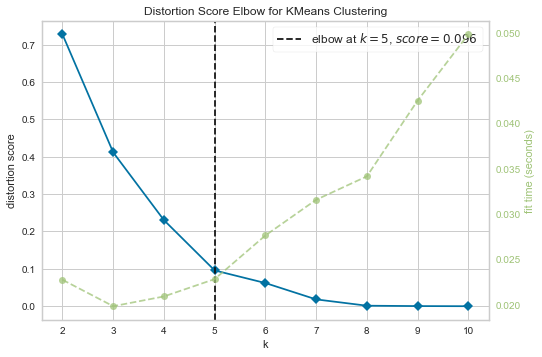

In [8]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(금천_df)
Elbow_M.show()

plt.show()

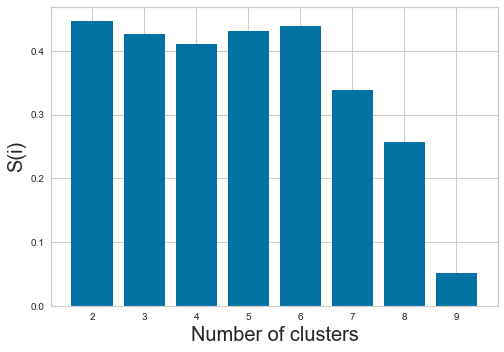

In [9]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(금천_df)
    silhouette_scores.append(silhouette_score(금천_df, m1.fit_predict(금천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [10]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


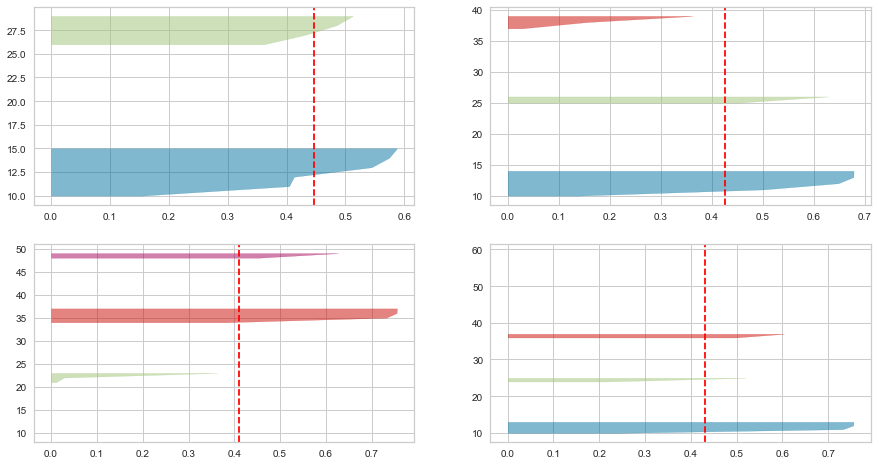

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(금천_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

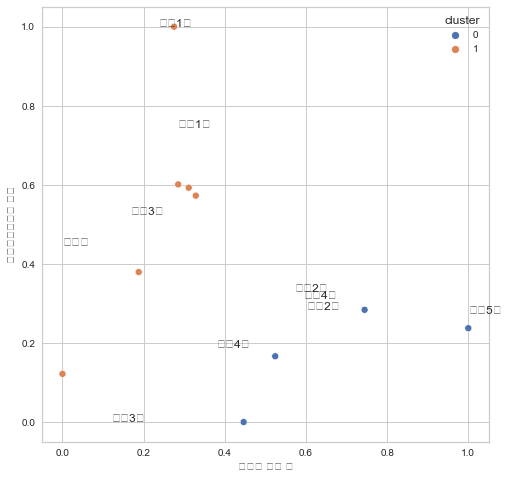

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

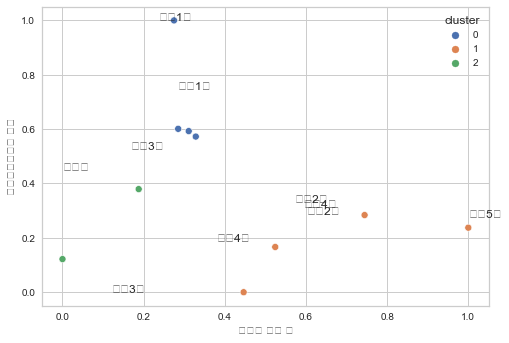

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

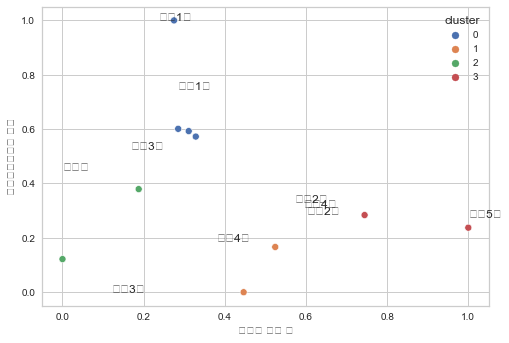

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

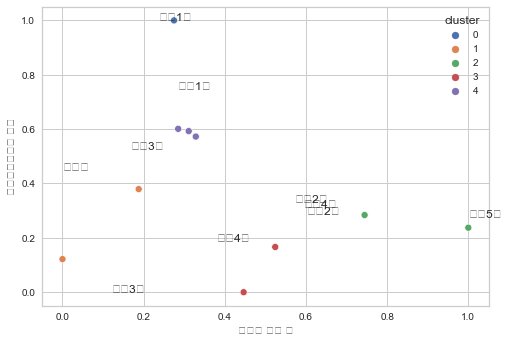

In [12]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(금천_df)
  금천_df['cluster'] = model.fit_predict(금천_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 금천_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 금천_df['생활보호대상자 비율']
  cluster_df['cluster'] = 금천_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('금천구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

In [13]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(금천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
금천_df['cluster'] = model.fit_predict(금천_df)

In [14]:
금천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    4
2    3
0    3
Name: cluster, dtype: int64

In [15]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.1541968 , 0.50039903, 0.66666667],
       [0.6787516 , 0.17191796, 2.5       ],
       [0.30818088, 0.58880784, 4.        ]])

In [16]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 금천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 금천_df['생활보호대상자 비율']
cluster_df['cluster'] = 금천_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,가산동,0.446362,0.000000,1
1,독산1동,1.000000,0.237411,1
2,독산2동,0.285085,0.601043,2
3,독산3동,0.524221,0.166385,1
4,독산4동,0.187777,0.379361,0
5,시흥1동,0.744424,0.283876,1
6,시흥2동,0.328420,0.572631,2
7,시흥3동,0.000000,0.121836,0
8,시흥4동,0.311038,0.592750,2
9,시흥5동,0.274813,1.000000,0


In [17]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,가산동,0.446362,0.000000,1
1,독산1동,1.000000,0.237411,1
2,독산2동,0.285085,0.601043,2
3,독산3동,0.524221,0.166385,1
4,독산4동,0.187777,0.379361,0
5,시흥1동,0.744424,0.283876,1
6,시흥2동,0.328420,0.572631,2
7,시흥3동,0.000000,0.121836,0
8,시흥4동,0.311038,0.592750,2
9,시흥5동,0.274813,1.000000,0


In [18]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/금천_cluster.csv')

#### 1-1. 군집화

In [19]:
# 클러스터별로 동 이름 출력하기

for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['독산4동', '시흥3동', '시흥5동']
cluster 1 :  ['가산동', '독산1동', '독산3동', '시흥1동']
cluster 2 :  ['독산2동', '시흥2동', '시흥4동']


#### 1-2. 클러스터별 인구수, 체육시설 수

In [20]:
# 클러스터별로 인구 수 합치기

금천_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/금천구_인구수, 수급인구비율.csv', index_col=0)
금천_peo_df = 금천_peo_df[['동', '인구 수']]
금천_peo_df = 금천_peo_df.rename(columns={'동':'dong'})
금천_peo_df

,dong,인구 수
0,가산동,25973.0
1,독산1동,44191.0
2,독산2동,20666.0
3,독산3동,28535.0
4,독산4동,17464.0
5,시흥1동,35781.0
6,시흥2동,22092.0
7,시흥3동,11285.0
8,시흥4동,21520.0
9,시흥5동,20328.0


In [21]:
df_all = pd.merge(cluster_df, 금천_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,가산동,0.446362,0.000000,1,25973.0
1,독산1동,1.000000,0.237411,1,44191.0
2,독산2동,0.285085,0.601043,2,20666.0
3,독산3동,0.524221,0.166385,1,28535.0
4,독산4동,0.187777,0.379361,0,17464.0
5,시흥1동,0.744424,0.283876,1,35781.0
6,시흥2동,0.328420,0.572631,2,22092.0
7,시흥3동,0.000000,0.121836,0,11285.0
8,시흥4동,0.311038,0.592750,2,21520.0
9,시흥5동,0.274813,1.000000,0,20328.0


In [22]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  49077.0
cluster 1 :  134480.0
cluster 2 :  64278.0


In [23]:
# 금천구 공체시설 수요만큼(5개) 입지선정
# 클러스터별로 인구 만명당 공체시설 비율이 비슷해지도록

# a+b+c=5

def prop(a, b, c):
  
  p1 = a*10000/49077
  p2 = b*10000/134480
  p3 = c*10000/64278

  return ((p1-p2)**2 + (p1-p3)**2 + (p2-p3)**2)

In [24]:
from itertools import product

In [25]:
lst = []

for i, j, k in product(range(6), range(6), range(6)):
  if (i+j+k==5):
    lst.append([prop(i,j,k), (i,j,k)])

In [26]:
lst.sort()
lst

[[0.007252504330650812, (1, 3, 1)],
 [0.04094409655145514, (1, 2, 2)],
 [0.1305034971742451, (2, 2, 1)],
 [0.13280154737171312, (0, 4, 1)],
 [0.13876651332980022, (1, 4, 0)],
 [0.15433450016267364, (0, 3, 2)],
 [0.17635372882489322, (2, 1, 2)],
 [0.23984128999221319, (1, 1, 3)],
 [0.24985886674355062, (2, 3, 0)],
 [0.2764741958007064, (0, 5, 0)],
 [0.3410730541735878, (0, 2, 3)],
 [0.3874095616954951, (2, 0, 3)],
 [0.5025545259024958, (3, 1, 1)],
 [0.5605633969829878, (3, 0, 2)],
 [0.603944084652925, (1, 0, 4)],
 [0.6097512560419577, (3, 2, 0)],
 [0.6930172094044558, (0, 1, 4)],
 [1.1234055905154032, (4, 0, 1)],
 [1.2101669658552774, (0, 0, 5)],
 [1.218443681225021, (4, 1, 0)],
 [2.075936142292741, (5, 0, 0)]]

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '독산4동', '시흥3동', '시흥5동' (1개)
- cluster1 : '가산동', '독산1동', '독산3동', '시흥1동' (3개)
- cluster2 : '독산2동', '시흥2동', '시흥4동' (1개)

#### **2020년 기준 금천구 공공체육시설 설치 개수**
- cluster0 : 독산4동(2개) + 시흥3동(0개) + 시흥5동(0개) = 2개
- cluster1 : 가산동(0개) + 독산1동(2개) + 독산3동(0개) + 시흥1동(1개) = 3개
- cluster2 : 독산2동(0개) + 시흥2동(1개) + 시흥4동(0개) = 1개

#### 1-3. 입지선정
- cluster0 : 1개 (독산4동)
- cluster1 : 3개 (시흥1동, 독산3동, 가산동)
- cluster2 : 1개 (시흥4동)

In [27]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.0157779059872627, 4], [0.16708639694423644, 7], [0.2641494257275944, 9]]

In [28]:
lst.sort()
lst

[[0.0157779059872627, 4], [0.16708639694423644, 7], [0.2641494257275944, 9]]

In [29]:
cluster_df.loc[[4]]

,dong,population,ratio,cluster
4,독산4동,0.187777,0.379361,0


In [30]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.08356054065845492, 0],
 [0.10748987250733211, 1],
 [0.023910473488315202, 3],
 [0.01684742445633279, 5]]

In [31]:
lst.sort()
lst

[[0.01684742445633279, 5],
 [0.023910473488315202, 3],
 [0.08356054065845492, 0],
 [0.10748987250733211, 1]]

In [32]:
cluster_df.loc[[5, 3, 0]]

,dong,population,ratio,cluster
5,시흥1동,0.744424,0.283876,1
3,독산3동,0.524221,0.166385,1
0,가산동,0.446362,0.000000,1


In [33]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.0006831213084193845, 2],
 [0.0006713382621221272, 6],
 [2.370239482380846e-05, 8]]

In [34]:
lst.sort()
lst

[[2.370239482380846e-05, 8],
 [0.0006713382621221272, 6],
 [0.0006831213084193845, 2]]

In [35]:
cluster_df.loc[[8]]

,dong,population,ratio,cluster
8,시흥4동,0.311038,0.59275,2


### 2. 서대문구

In [36]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서대문_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/서대문구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서대문_df['동']
서대문_df = 서대문_df.iloc[:,2:]
서대문_df = 서대문_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서대문_df

,인구 수,생활보호대상자 비율
0,0.149974,0.924647
1,0.414598,0.467839
2,0.000000,0.785922
3,0.066570,0.979826
4,0.360583,0.601857
5,0.540955,0.927890
6,0.072948,0.000000
7,0.672641,0.856628
8,0.170482,0.401251
9,0.751403,1.000000


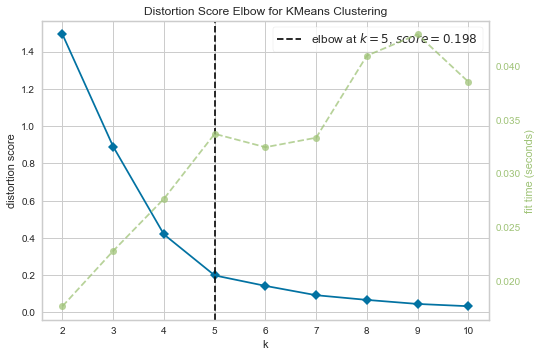

In [37]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서대문_df)
Elbow_M.show()

plt.show()

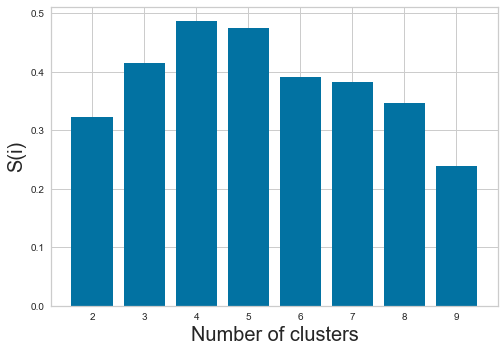

In [38]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서대문_df)
    silhouette_scores.append(silhouette_score(서대문_df, m1.fit_predict(서대문_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [39]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


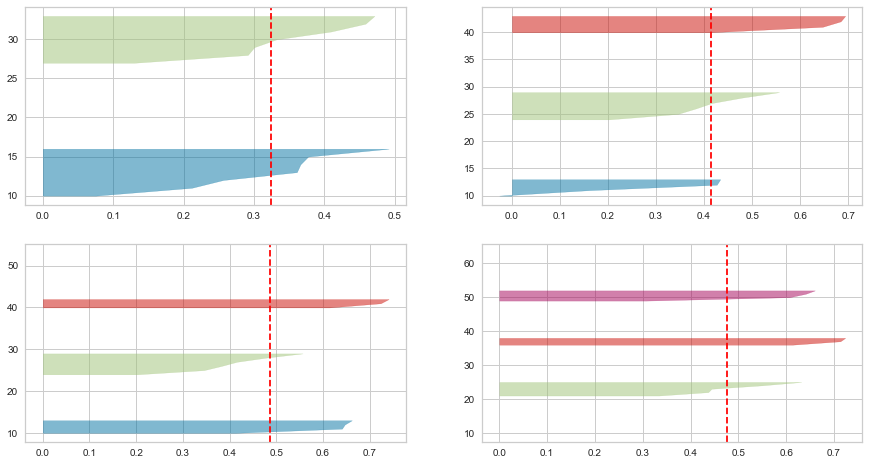

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서대문_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396

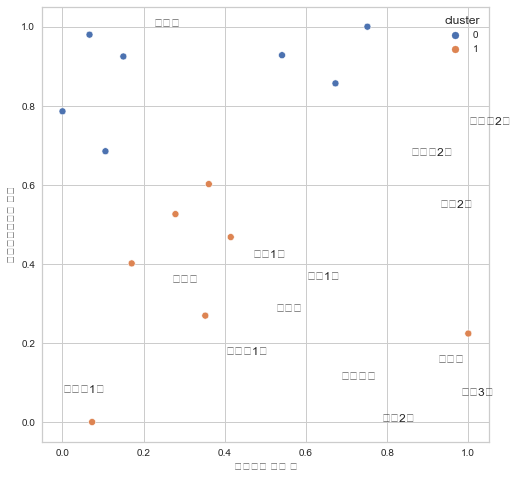

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396

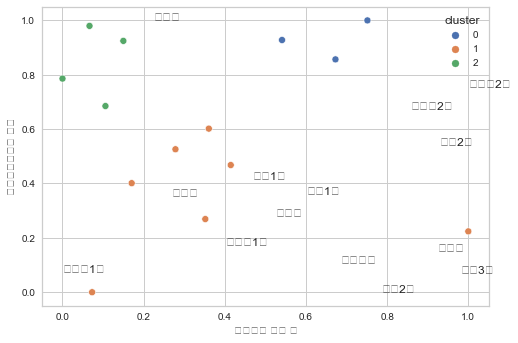

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396

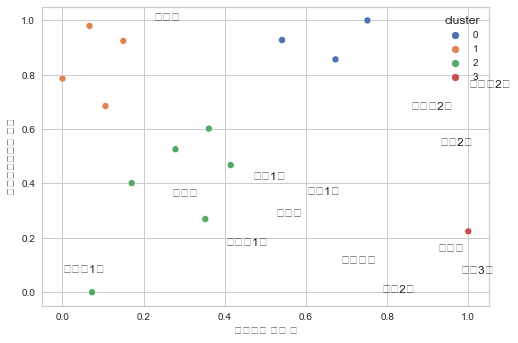

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396

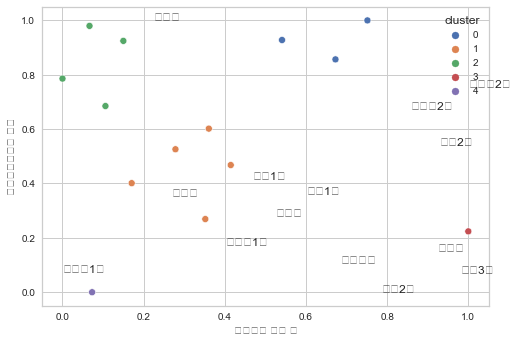

In [41]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서대문_df)
  서대문_df['cluster'] = model.fit_predict(서대문_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서대문_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서대문_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서대문_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서대문구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [42]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서대문_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서대문_df['cluster'] = model.fit_predict(서대문_df)

In [43]:
서대문_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
1    4
0    3
3    2
Name: cluster, dtype: int64

In [44]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[6.54999798e-01, 9.28172629e-01, 2.22044605e-16],
       [8.05982802e-02, 8.43838377e-01, 2.00000000e+00],
       [3.15183077e-01, 4.53209101e-01, 1.00000000e+00],
       [5.36474103e-01, 1.11927440e-01, 3.50000000e+00]])

In [45]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서대문_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서대문_df['생활보호대상자 비율']
cluster_df['cluster'] = 서대문_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,천연동,0.149974,0.924647,1
1,홍제1동,0.414598,0.467839,2
2,홍제2동,0.000000,0.785922,1
3,홍제3동,0.066570,0.979826,1
4,홍은1동,0.360583,0.601857,2
5,홍은2동,0.540955,0.927890,0
6,남가좌1동,0.072948,0.000000,3
7,남가좌2동,0.672641,0.856628,0
8,북가좌1동,0.170482,0.401251,2
9,북가좌2동,0.751403,1.000000,0


In [46]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,천연동,0.149974,0.924647,1
1,홍제1동,0.414598,0.467839,2
2,홍제2동,0.000000,0.785922,1
3,홍제3동,0.066570,0.979826,1
4,홍은1동,0.360583,0.601857,2
5,홍은2동,0.540955,0.927890,0
6,남가좌1동,0.072948,0.000000,3
7,남가좌2동,0.672641,0.856628,0
8,북가좌1동,0.170482,0.401251,2
9,북가좌2동,0.751403,1.000000,0


In [47]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/서대문_cluster.csv')

#### 2-1. 군집화

In [48]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['홍은2동', '남가좌2동', '북가좌2동']
cluster 1 :  ['천연동', '홍제2동', '홍제3동', '북아현동']
cluster 2 :  ['홍제1동', '홍은1동', '북가좌1동', '충현동', '신촌동']
cluster 3 :  ['남가좌1동', '연희동']


#### 2-2. 클러스터별 인구수, 체육시설 수

In [49]:
# 클러스터별로 인구 수 합치기

서대문_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/서대문구_인구수, 수급인구비율.csv', index_col=0)
서대문_peo_df = 서대문_peo_df[['동', '인구 수']]
서대문_peo_df = 서대문_peo_df.rename(columns={'동':'dong'})
서대문_peo_df

,dong,인구 수
0,천연동,18049.0
1,홍제1동,24604.0
2,홍제2동,14334.0
3,홍제3동,15983.0
4,홍은1동,23266.0
5,홍은2동,27734.0
6,남가좌1동,16141.0
7,남가좌2동,30996.0
8,북가좌1동,18557.0
9,북가좌2동,32947.0


In [50]:
df_all = pd.merge(cluster_df, 서대문_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,천연동,0.149974,0.924647,1,18049.0
1,홍제1동,0.414598,0.467839,2,24604.0
2,홍제2동,0.000000,0.785922,1,14334.0
3,홍제3동,0.066570,0.979826,1,15983.0
4,홍은1동,0.360583,0.601857,2,23266.0
5,홍은2동,0.540955,0.927890,0,27734.0
6,남가좌1동,0.072948,0.000000,3,16141.0
7,남가좌2동,0.672641,0.856628,0,30996.0
8,북가좌1동,0.170482,0.401251,2,18557.0
9,북가좌2동,0.751403,1.000000,0,32947.0


In [51]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  91677.0
cluster 1 :  65322.0
cluster 2 :  110707.0
cluster 3 :  55246.0


In [52]:
# a+b+c+d=7

def prop(a, b, c, d):
  
  p1 = a*10000/91677
  p2 = b*10000/65322
  p3 = c*10000/110707
  p4 = d*10000/55246

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [53]:
lst = []

In [54]:
for i, j, k, l in product(range(8), range(8), range(8), range(8)):
  if (i+j+k+l==7):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [55]:
lst

[[4.816323576653945, (0, 0, 0, 7)],
 [3.36679831529582, (0, 0, 1, 6)],
 [2.2282140961161856, (0, 0, 2, 5)],
 [1.40057091911504, (0, 0, 3, 4)],
 [0.8838687842923835, (0, 0, 4, 3)],
 [0.6781076916482159, (0, 0, 5, 2)],
 [0.7832876411825376, (0, 0, 6, 1)],
 [1.1994086328953482, (0, 0, 7, 0)],
 [3.2763086288369707, (0, 1, 0, 6)],
 [2.083832495962539, (0, 1, 1, 5)],
 [1.2022974052665965, (0, 1, 2, 4)],
 [0.6317033567491429, (0, 1, 3, 3)],
 [0.37205035041017825, (0, 1, 4, 2)],
 [0.4233383862497028, (0, 1, 5, 1)],
 [0.7855674642677164, (0, 1, 6, 0)],
 [2.1843343350539697, (0, 2, 0, 5)],
 [1.24890733066323, (0, 2, 1, 4)],
 [0.6244213684509792, (0, 2, 2, 3)],
 [0.3108764484172176, (0, 2, 3, 2)],
 [0.308272570561945, (0, 2, 4, 1)],
 [0.6166097348851614, (0, 2, 5, 0)],
 [1.5404006953049403, (0, 3, 0, 4)],
 [0.8620228193978925, (0, 3, 1, 3)],
 [0.4945859856693338, (0, 3, 2, 2)],
 [0.4380901941192641, (0, 3, 3, 1)],
 [0.6925354447476835, (0, 3, 4, 0)],
 [1.344507709589883, (0, 4, 0, 3)],
 [0.923178

In [56]:
lst.sort()

In [57]:
lst

[[0.031180209490282842, (2, 1, 3, 1)],
 [0.041955305917017925, (2, 2, 2, 1)],
 [0.07473505815958419, (3, 1, 2, 1)],
 [0.09523595922314433, (1, 2, 3, 1)],
 [0.10363901597917821, (2, 1, 2, 2)],
 [0.14738131885365569, (1, 1, 4, 1)],
 [0.14843061064356572, (3, 2, 1, 1)],
 [0.15796670417834116, (1, 1, 3, 2)],
 [0.15971325824262686, (1, 2, 2, 2)],
 [0.16830602610071038, (2, 2, 1, 2)],
 [0.20906728581268946, (3, 1, 1, 2)],
 [0.22654562791181448, (2, 2, 3, 0)],
 [0.24592294492067962, (3, 0, 3, 1)],
 [0.2513438726849679, (3, 1, 3, 0)],
 [0.2652885523086248, (2, 0, 4, 1)],
 [0.2696624451798765, (2, 1, 4, 0)],
 [0.27114751147415234, (3, 2, 2, 0)],
 [0.2780458648615598, (4, 1, 1, 1)],
 [0.28385544510272304, (2, 0, 3, 2)],
 [0.2879740388377099, (1, 3, 2, 1)],
 [0.2976138415888299, (2, 3, 1, 1)],
 [0.308272570561945, (0, 2, 4, 1)],
 [0.3108764484172176, (0, 2, 3, 2)],
 [0.3263632588789878, (3, 0, 2, 2)],
 [0.3366547519914681, (3, 2, 0, 2)],
 [0.3416997023821508, (1, 2, 4, 0)],
 [0.37205035041017825,

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '홍은2동', '남가좌2동', '북가좌2동' (2개)
- cluster1 : '천연동', '홍제2동', '홍제3동', '북아현동' (1개)
- cluster2 : '홍제1동', '홍은1동', '북가좌1동', '충현동', '신촌동' (3개)
- cluster3 : '남가좌1동', '연희동' (1개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 홍은2동(1개) + 남가좌2동(1개) + 북가좌2동(0개) = 2개
- cluster1 : 천연동(0개) + 홍제2동(1개) + 홍제3동(0개) + 북아현동(1개) = 2개
- cluster2 : 홍제1동(0개) + 홍은1동(0개) + 북가좌1동(0개) + 충현동(0개) + 신촌동(1개) = 1개
- cluster3 : 남가좌1동(0개) + 연희동(2개) = 2개

#### 2-3. 입지선정
- cluster0 : 2개 (남가좌2동, 홍은2동)
- cluster1 : 1개 (홍제2동)
- cluster2 : 3개 (충현동, 홍제1동, 북가좌1동)
- cluster3 : 1개 (연희동)

In [58]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.013006261985947558, 5],
 [0.005429839410234293, 7],
 [0.014452719633796754, 9]]

In [59]:
lst.sort()
lst

[[0.005429839410234293, 7],
 [0.013006261985947558, 5],
 [0.014452719633796754, 9]]

In [60]:
cluster_df.loc[[7, 5]]

,dong,population,ratio,cluster
7,남가좌2동,0.672641,0.856628,0
5,홍은2동,0.540955,0.927890,0


In [61]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.01134303545284815, 0],
 [0.009850427027257488, 2],
 [0.018689369260117848, 3],
 [0.02588035226183405, 11]]

In [62]:
lst.sort()
lst

[[0.009850427027257488, 2],
 [0.01134303545284815, 0],
 [0.018689369260117848, 3],
 [0.02588035226183405, 11]]

In [63]:
cluster_df.loc[[2]]

,dong,population,ratio,cluster
2,홍제2동,0.0,0.785922,1


In [64]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.010097295069877133, 1],
 [0.02415731702606445, 4],
 [0.023638123958050903, 8],
 [0.006650668105988184, 10],
 [0.035233568826023534, 12]]

In [65]:
lst.sort()
lst

[[0.006650668105988184, 10],
 [0.010097295069877133, 1],
 [0.023638123958050903, 8],
 [0.02415731702606445, 4],
 [0.035233568826023534, 12]]

In [66]:
cluster_df.loc[[10, 1, 8]]

,dong,population,ratio,cluster
10,충현동,0.278350,0.525969,2
1,홍제1동,0.414598,0.467839,2
8,북가좌1동,0.170482,0.401251,2


In [67]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.22738400927919455, 6], [0.22738400927919453, 13]]

In [68]:
lst.sort()
lst

[[0.22738400927919453, 13], [0.22738400927919455, 6]]

In [69]:
cluster_df.loc[[13]]

,dong,population,ratio,cluster
13,연희동,1.0,0.223855,3


### 3. 마포구

In [70]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

마포_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/마포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =마포_df['동']
마포_df = 마포_df.iloc[:,2:]
마포_df = 마포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
마포_df

,인구 수,생활보호대상자 비율
0,0.337817,0.182198
1,0.107858,0.377893
2,0.000000,0.376703
3,0.386333,0.117565
4,0.507714,0.094878
5,0.205431,0.455475
6,0.296673,0.499622
7,0.228448,0.395222
8,0.137313,0.124357
9,0.245100,0.381192


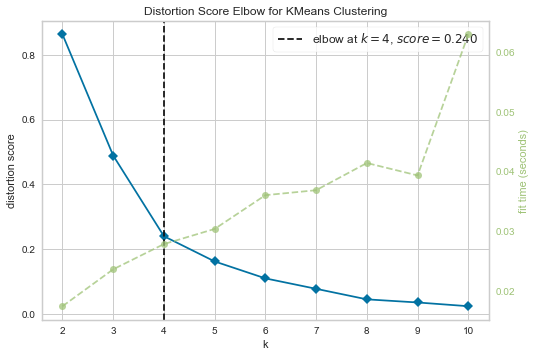

In [71]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(마포_df)
Elbow_M.show()

plt.show()


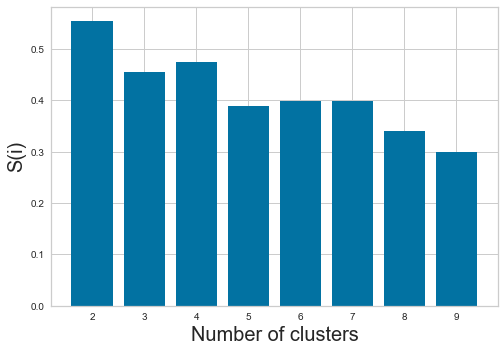

In [72]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(마포_df)
    silhouette_scores.append(silhouette_score(마포_df, m1.fit_predict(마포_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [73]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


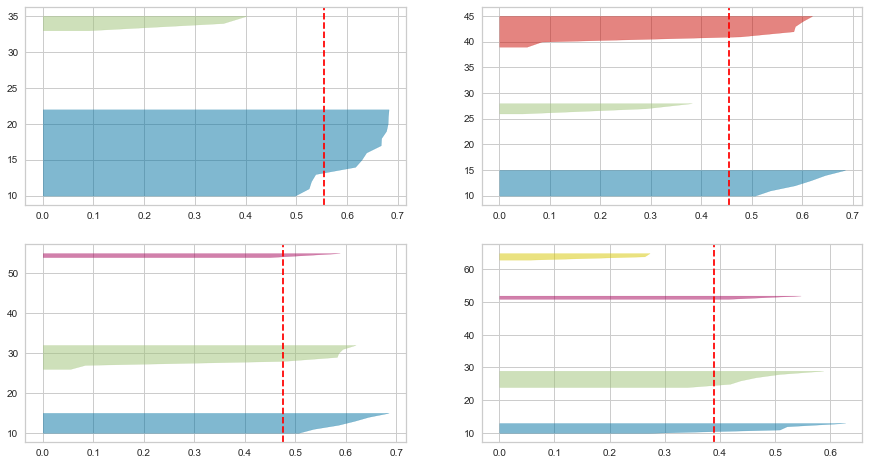

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(마포_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\

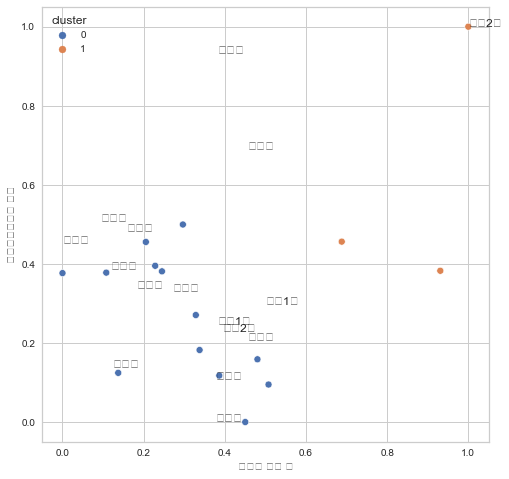

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\

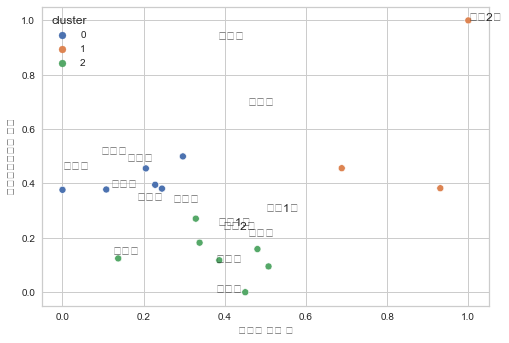

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\

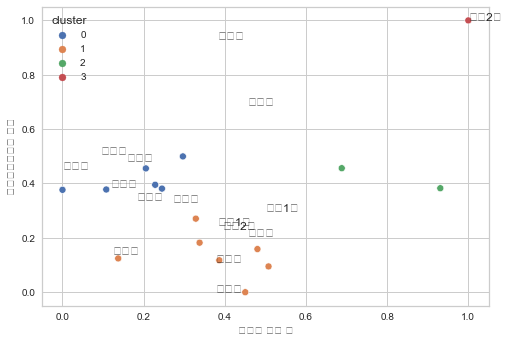

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\

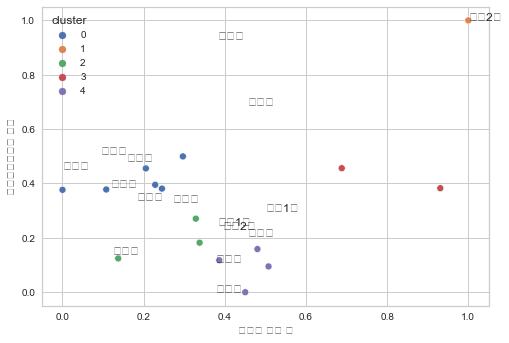

In [75]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(마포_df)
  마포_df['cluster'] = model.fit_predict(마포_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 마포_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 마포_df['생활보호대상자 비율']
  cluster_df['cluster'] = 마포_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('마포구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [76]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(마포_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
마포_df['cluster'] = model.fit_predict(마포_df)

In [77]:
마포_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    6
2    5
0    4
3    1
Name: cluster, dtype: int64

In [78]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.45619493, 0.09278882, 4.        ],
       [0.18058503, 0.41435121, 0.        ],
       [0.48454594, 0.28322798, 2.4       ],
       [1.        , 1.        , 1.        ]])

In [79]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 마포_df['인구 수']
cluster_df['생활보호대상자 비율'] = 마포_df['생활보호대상자 비율']
cluster_df['cluster'] = 마포_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,용강동,0.337817,0.182198,2
1,대흥동,0.107858,0.377893,1
2,염리동,0.000000,0.376703,1
3,신수동,0.386333,0.117565,0
4,서교동,0.507714,0.094878,0
5,합정동,0.205431,0.455475,1
6,망원1동,0.296673,0.499622,1
7,망원2동,0.228448,0.395222,1
8,연남동,0.137313,0.124357,2
9,성산1동,0.245100,0.381192,1


In [80]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,용강동,0.337817,0.182198,2
1,대흥동,0.107858,0.377893,1
2,염리동,0.000000,0.376703,1
3,신수동,0.386333,0.117565,0
4,서교동,0.507714,0.094878,0
5,합정동,0.205431,0.455475,1
6,망원1동,0.296673,0.499622,1
7,망원2동,0.228448,0.395222,1
8,연남동,0.137313,0.124357,2
9,성산1동,0.245100,0.381192,1


In [81]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/마포_cluster.csv')

#### 3-1. 군집화

In [82]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신수동', '서교동', '서강동', '아현동']
cluster 1 :  ['대흥동', '염리동', '합정동', '망원1동', '망원2동', '성산1동']
cluster 2 :  ['용강동', '연남동', '상암동', '도화동', '공덕동']
cluster 3 :  ['성산2동']


#### 3-2. 클러스터별 인구수, 체육시설 수

In [83]:
# 클러스터별로 인구 수 합치기

마포_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/마포구_인구수, 수급인구비율.csv', index_col=0)
마포_peo_df = 마포_peo_df[['동', '인구 수']]
마포_peo_df = 마포_peo_df.rename(columns={'동':'dong'})
마포_peo_df

,dong,인구 수
0,용강동,22257.0
1,대흥동,15863.0
2,염리동,12864.0
3,신수동,23606.0
4,서교동,26981.0
5,합정동,18576.0
6,망원1동,21113.0
7,망원2동,19216.0
8,연남동,16682.0
9,성산1동,19679.0


In [84]:
df_all = pd.merge(cluster_df, 마포_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,용강동,0.337817,0.182198,2,22257.0
1,대흥동,0.107858,0.377893,1,15863.0
2,염리동,0.000000,0.376703,1,12864.0
3,신수동,0.386333,0.117565,0,23606.0
4,서교동,0.507714,0.094878,0,26981.0
5,합정동,0.205431,0.455475,1,18576.0
6,망원1동,0.296673,0.499622,1,21113.0
7,망원2동,0.228448,0.395222,1,19216.0
8,연남동,0.137313,0.124357,2,16682.0
9,성산1동,0.245100,0.381192,1,19679.0


In [85]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  102194.0
cluster 1 :  107311.0
cluster 2 :  131684.0
cluster 3 :  40669.0


In [86]:
# a+b+c+d=8

def prop(a, b, c, d):
  
  p1 = a*10000/102194
  p2 = b*10000/107311
  p3 = c*10000/131684
  p4 = d*10000/40669

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [87]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [88]:
lst.sort()
lst

[[0.009222367998501256, (2, 2, 3, 1)],
 [0.03774508843078406, (2, 3, 2, 1)],
 [0.04740405999286286, (3, 2, 2, 1)],
 [0.07596073500162935, (1, 3, 3, 1)],
 [0.08851296819781677, (3, 1, 3, 1)],
 [0.0928163939716135, (1, 2, 4, 1)],
 [0.09570965560572214, (2, 1, 4, 1)],
 [0.1213051598274126, (3, 3, 1, 1)],
 [0.17411508407114887, (1, 4, 2, 1)],
 [0.17909671901699403, (2, 3, 3, 0)],
 [0.18127781690257055, (2, 4, 1, 1)],
 [0.19034165062396813, (3, 2, 3, 0)],
 [0.19084586474541154, (2, 2, 4, 0)],
 [0.20309199875738523, (4, 1, 2, 1)],
 [0.20736146995469826, (4, 2, 1, 1)],
 [0.22397088429781759, (3, 3, 2, 0)],
 [0.22468206098110136, (1, 1, 5, 1)],
 [0.23595209953994845, (0, 3, 4, 1)],
 [0.24463188444227435, (3, 0, 4, 1)],
 [0.25599827170364436, (1, 3, 4, 0)],
 [0.2717224249896223, (3, 1, 4, 0)],
 [0.28235758132808025, (2, 4, 2, 0)],
 [0.28872806920720095, (0, 4, 3, 1)],
 [0.2972069512524467, (2, 0, 5, 1)],
 [0.29818613791219956, (0, 2, 5, 1)],
 [0.29965384308936655, (2, 2, 2, 2)],
 [0.31021626770

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '신수동', '서교동', '서강동', '아현동' (2개)
- cluster1 : '대흥동', '염리동', '합정동', '망원1동', '망원2동', '성산1동' (2개)
- cluster2 : '용강동', '연남동', '상암동', '도화동', '공덕동' (3개)
- cluster3 : '성산2동' (1개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 신수동(1개) + 서교동(0개) + 서강동(0개) + 아현동(1개) = 2개
- cluster1 : 대흥동(2개) + 염리동(0개) + 합정동(0개) + 망원1동(0개) + 망원2동(1개) + 성산1동(1개) = 4개
- cluster2 : 용강동(1개) + 연남동(0개) + 상암동(0개) + 도화동(0개) + 공덕동(1개) = 2개
- cluster3 : 성산2동(3개) = 3개

#### 3-3. 입지선정
- cluster0 : 2개 (서교동, 아현동)
- cluster1 : 2개 (합정동, 망원2동)
- cluster2 : 3개 (도화동, 용강동, 상암동)
- cluster3 : 1개 (성산2동)

In [89]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.005494507245595529, 3],
 [0.002658624756517994, 4],
 [0.008643919919107318, 13],
 [0.004930839257645798, 15]]

In [90]:
lst.sort()
lst

[[0.002658624756517994, 4],
 [0.004930839257645798, 15],
 [0.005494507245595529, 3],
 [0.008643919919107318, 13]]

In [91]:
cluster_df.loc[[4, 15]]

,dong,population,ratio,cluster
4,서교동,0.507714,0.094878,0
15,아현동,0.480381,0.158712,0


In [92]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.006618369723770947, 1],
 [0.034028302697949715, 2],
 [0.0023084550593185293, 5],
 [0.020747595263411904, 6],
 [0.002656816035218509, 7],
 [0.005261678417318946, 9]]

In [93]:
lst.sort()
lst

[[0.0023084550593185293, 5],
 [0.002656816035218509, 7],
 [0.005261678417318946, 9],
 [0.006618369723770947, 1],
 [0.020747595263411904, 6],
 [0.034028302697949715, 2]]

In [94]:
cluster_df.loc[[5, 7]]

,dong,population,ratio,cluster
5,합정동,0.205431,0.455475,1
7,망원2동,0.228448,0.395222,1


In [95]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.03173655529987119, 0],
 [0.14581055159300563, 8],
 [0.07139474057176605, 11],
 [0.024507890520371264, 12],
 [0.20918790445822588, 14]]

In [96]:
lst.sort()
lst

[[0.024507890520371264, 12],
 [0.03173655529987119, 0],
 [0.07139474057176605, 11],
 [0.14581055159300563, 8],
 [0.20918790445822588, 14]]

In [97]:
cluster_df.loc[[12, 0, 11]]

,dong,population,ratio,cluster
12,도화동,0.328502,0.270650,2
0,용강동,0.337817,0.182198,2
11,상암동,0.688114,0.456303,2


In [98]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.0, 10]]

In [99]:
lst.sort()
lst

[[0.0, 10]]

In [100]:
cluster_df.loc[[10]]

,dong,population,ratio,cluster
10,성산2동,1.0,1.0,3


### 4. 중구

In [101]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

중구_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/중구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =중구_df['동']
중구_df = 중구_df.iloc[:,2:]
중구_df = 중구_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
중구_df

,인구 수,생활보호대상자 비율
0,0.067849,0.000000
1,0.246312,1.000000
2,0.111653,0.095991
3,0.181127,0.049312
4,0.227530,0.105963
5,0.289140,0.211977
6,0.000000,0.713043
7,0.578410,0.334665
8,0.751544,0.292376
9,0.704101,0.456875


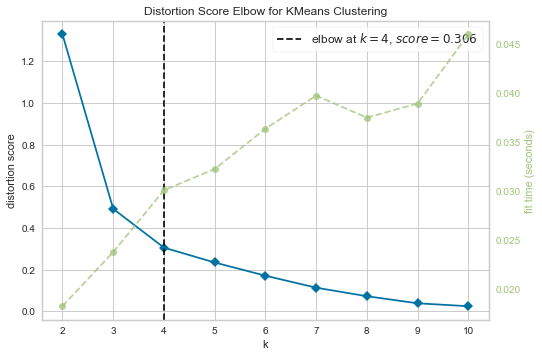

In [102]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(중구_df)
Elbow_M.show()

plt.show()

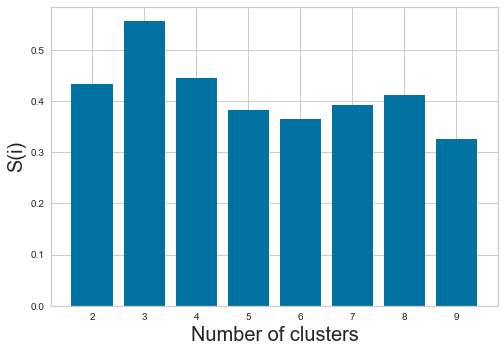

In [103]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(중구_df)
    silhouette_scores.append(silhouette_score(중구_df, m1.fit_predict(중구_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [104]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


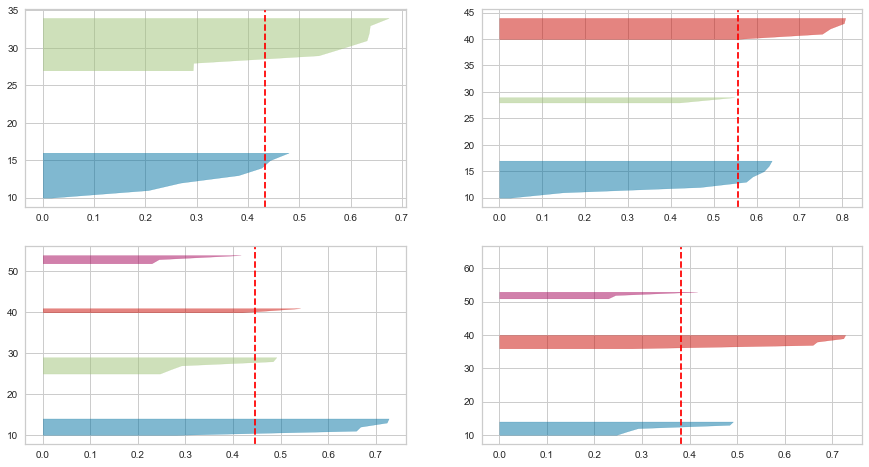

In [105]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(중구_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 

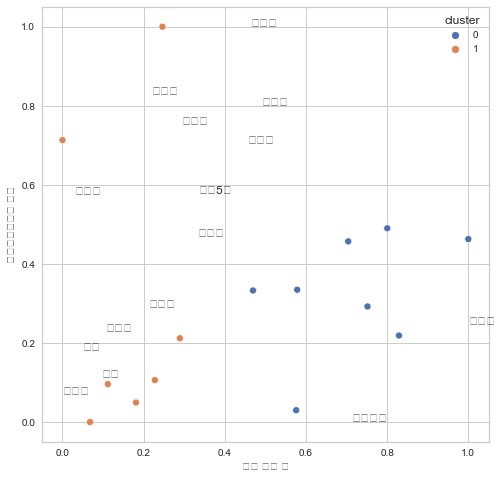

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 

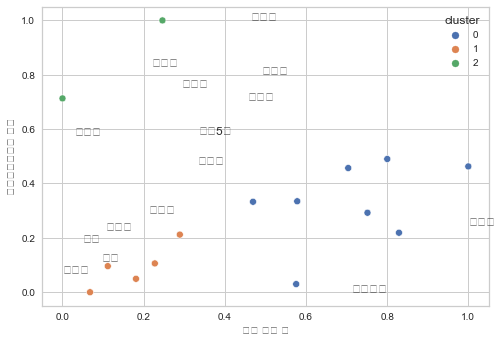

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 

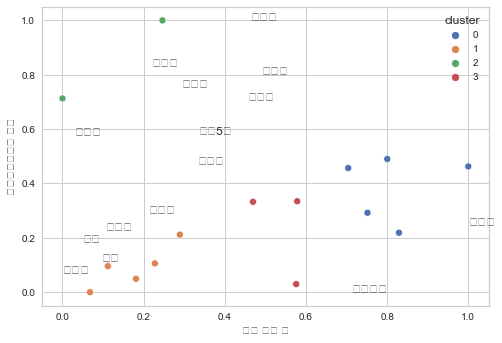

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 

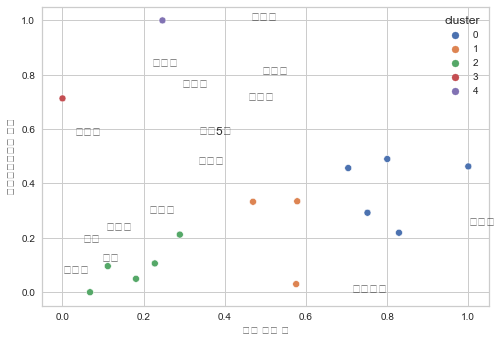

In [106]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(중구_df)
  중구_df['cluster'] = model.fit_predict(중구_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 중구_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 중구_df['생활보호대상자 비율']
  cluster_df['cluster'] = 중구_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('중구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()


k=4

In [107]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(중구_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
중구_df['cluster'] = model.fit_predict(중구_df)

In [108]:
중구_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
1    5
3    3
0    2
Name: cluster, dtype: int64

In [109]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.12315591, 0.85652152, 3.5       ],
       [0.81701436, 0.3842026 , 0.        ],
       [0.1754598 , 0.09264862, 2.        ],
       [0.54123611, 0.23243403, 1.        ]])

In [110]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 중구_df['인구 수']
cluster_df['생활보호대상자 비율'] = 중구_df['생활보호대상자 비율']
cluster_df['cluster'] = 중구_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,소공동,0.067849,0.000000,2
1,회현동,0.246312,1.000000,0
2,명동,0.111653,0.095991,2
3,필동,0.181127,0.049312,2
4,장충동,0.227530,0.105963,2
5,광희동,0.289140,0.211977,2
6,을지로동,0.000000,0.713043,0
7,신당5동,0.578410,0.334665,3
8,황학동,0.751544,0.292376,1
9,중림동,0.704101,0.456875,1


In [111]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,소공동,0.067849,0.000000,2
1,회현동,0.246312,1.000000,0
2,명동,0.111653,0.095991,2
3,필동,0.181127,0.049312,2
4,장충동,0.227530,0.105963,2
5,광희동,0.289140,0.211977,2
6,을지로동,0.000000,0.713043,0
7,신당5동,0.578410,0.334665,3
8,황학동,0.751544,0.292376,1
9,중림동,0.704101,0.456875,1


In [112]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/중구_cluster.csv')

In [113]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['회현동', '을지로동']
cluster 1 :  ['황학동', '중림동', '다산동', '약수동', '청구동']
cluster 2 :  ['소공동', '명동', '필동', '장충동', '광희동']
cluster 3 :  ['신당5동', '신당동', '동화동']


### 5. 구로구

In [114]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

구로_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/구로구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =구로_df['동']
구로_df = 구로_df.iloc[:,2:]
구로_df = 구로_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
구로_df

,인구 수,생활보호대상자 비율
0,0.872078,0.019501
1,0.289071,0.000000
2,0.736976,0.639076
3,0.449514,0.267071
4,0.422407,0.705713
5,0.709085,0.203414
6,0.364193,0.515424
7,0.533108,0.790313
8,0.822846,0.904466
9,0.704339,0.435399


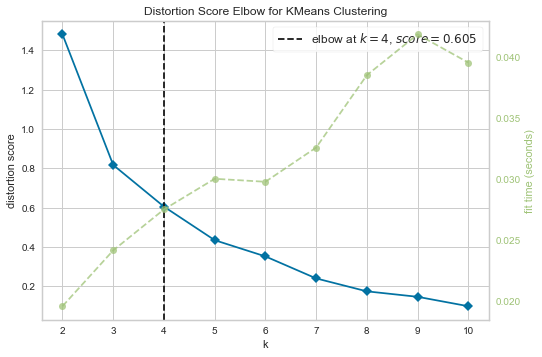

In [115]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(구로_df)
Elbow_M.show()

plt.show()

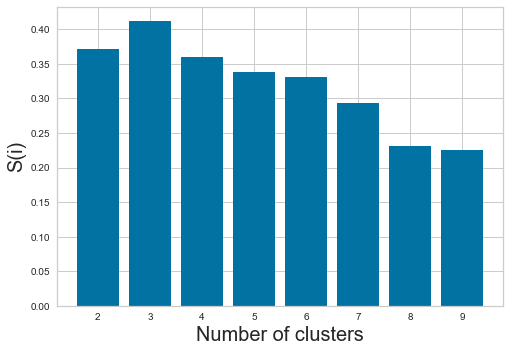

In [116]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(구로_df)
    silhouette_scores.append(silhouette_score(구로_df, m1.fit_predict(구로_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [117]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


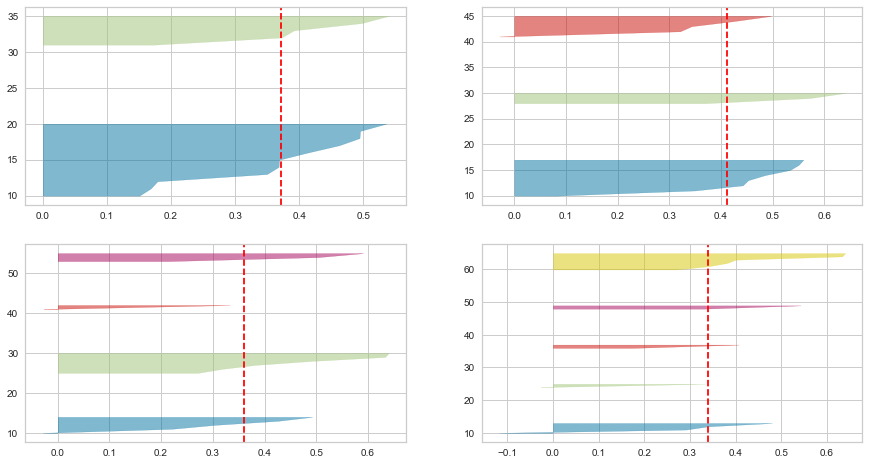

In [118]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(구로_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\

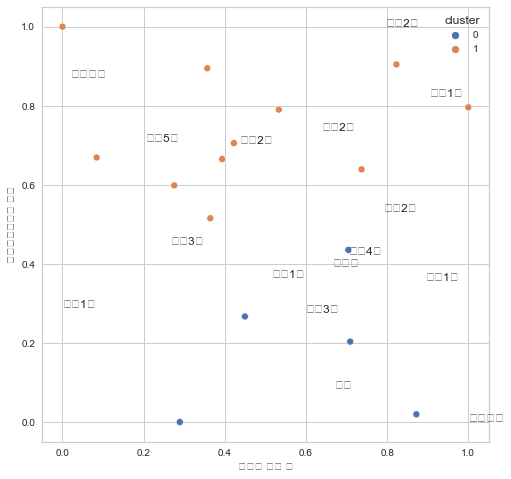

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\

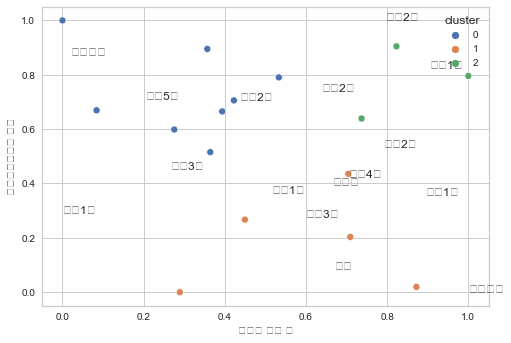

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\

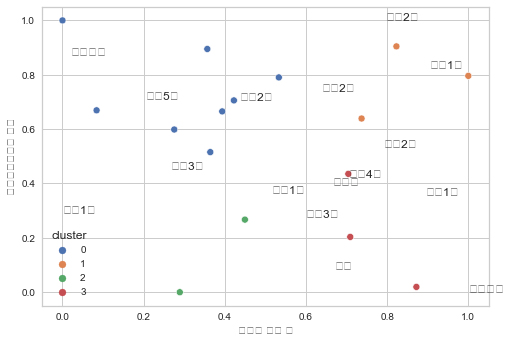

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\

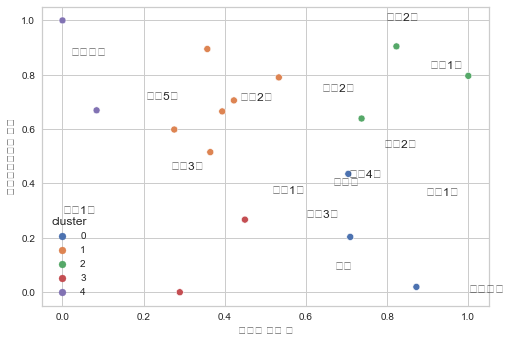

In [119]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(구로_df)
  구로_df['cluster'] = model.fit_predict(구로_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 구로_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 구로_df['생활보호대상자 비율']
  cluster_df['cluster'] = 구로_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('구로구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=3으로 결정

In [120]:
k = 3

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(구로_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
구로_df['cluster'] = model.fit_predict(구로_df)

In [121]:
구로_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    9
1    4
2    3
Name: cluster, dtype: int64

In [122]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.54504681, 0.72329273, 1.33333333],
       [0.20564295, 0.48407221, 3.5       ],
       [0.76183378, 0.21943771, 0.        ]])

In [123]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 구로_df['인구 수']
cluster_df['생활보호대상자 비율'] = 구로_df['생활보호대상자 비율']
cluster_df['cluster'] = 구로_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,신도림동,0.872078,0.019501,2
1,구로1동,0.289071,0.000000,1
2,구로2동,0.736976,0.639076,0
3,구로3동,0.449514,0.267071,1
4,구로4동,0.422407,0.705713,0
5,구로5동,0.709085,0.203414,2
6,고척1동,0.364193,0.515424,0
7,고척2동,0.533108,0.790313,0
8,개봉1동,0.822846,0.904466,0
9,개봉2동,0.704339,0.435399,2


In [124]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,신도림동,0.872078,0.019501,2
1,구로1동,0.289071,0.000000,1
2,구로2동,0.736976,0.639076,0
3,구로3동,0.449514,0.267071,1
4,구로4동,0.422407,0.705713,0
5,구로5동,0.709085,0.203414,2
6,고척1동,0.364193,0.515424,0
7,고척2동,0.533108,0.790313,0
8,개봉1동,0.822846,0.904466,0
9,개봉2동,0.704339,0.435399,2


In [125]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/구로_cluster.csv')

#### 5-1. 군집화

In [126]:
# 클러스터별로 동 이름 출력하기

for i in range(3):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['구로2동', '구로4동', '고척1동', '고척2동', '개봉1동', '개봉3동', '오류1동', '오류2동', '수궁동']
cluster 1 :  ['구로1동', '구로3동', '가리봉동', '항동']
cluster 2 :  ['신도림동', '구로5동', '개봉2동']


#### 5-2. 클러스터별 인구수, 체육시설 수

In [127]:
# 클러스터별로 인구 수 합치기

구로_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/구로구_인구수, 수급인구비율.csv', index_col=0)
구로_peo_df = 구로_peo_df[['동', '인구 수']]
구로_peo_df = 구로_peo_df.rename(columns={'동':'dong'})
구로_peo_df

,dong,인구 수
0,신도림동,36494.0
1,구로1동,21632.0
2,구로2동,33050.0
3,구로3동,25722.0
4,구로4동,25031.0
5,구로5동,32339.0
6,고척1동,23547.0
7,고척2동,27853.0
8,개봉1동,35239.0
9,개봉2동,32218.0


In [128]:
df_all = pd.merge(cluster_df, 구로_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,신도림동,0.872078,0.019501,2,36494.0
1,구로1동,0.289071,0.000000,1,21632.0
2,구로2동,0.736976,0.639076,0,33050.0
3,구로3동,0.449514,0.267071,1,25722.0
4,구로4동,0.422407,0.705713,0,25031.0
5,구로5동,0.709085,0.203414,2,32339.0
6,고척1동,0.364193,0.515424,0,23547.0
7,고척2동,0.533108,0.790313,0,27853.0
8,개봉1동,0.822846,0.904466,0,35239.0
9,개봉2동,0.704339,0.435399,2,32218.0


In [129]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  253416.0
cluster 1 :  78021.0
cluster 2 :  101051.0


In [130]:
# a+b+c=9

def prop(a, b, c):
  
  p1 = a*10000/253416
  p2 = b*10000/78021
  p3 = c*10000/101051

  return ((p1-p2)**2 + (p1-p3)**2  + (p2-p3)**2)

In [131]:
lst = []

for i, j, k in product(range(10), range(10), range(10)):
  if (i+j+k==9):
    lst.append([prop(i,j,k), (i,j,k)])

In [132]:
lst.sort()
lst

[[0.006898828225252635, (5, 2, 2)],
 [0.01816659496795537, (6, 1, 2)],
 [0.03067639835760387, (4, 2, 3)],
 [0.043157545397087604, (5, 1, 3)],
 [0.044142306466935136, (6, 2, 1)],
 [0.05419669291285686, (7, 1, 1)],
 [0.08780137965902318, (4, 3, 2)],
 [0.11036556949459342, (3, 3, 3)],
 [0.11547501686398887, (3, 2, 4)],
 [0.12160467988713142, (7, 0, 2)],
 [0.12625823819748666, (5, 3, 1)],
 [0.12916954420025356, (4, 1, 4)],
 [0.14240683308265137, (7, 2, 0)],
 [0.14780901061304463, (6, 0, 3)],
 [0.15124783923179208, (8, 1, 0)],
 [0.1564213975352519, (8, 0, 1)],
 [0.19395080770419743, (2, 3, 4)],
 [0.2257361451099839, (6, 3, 0)],
 [0.23503438971299162, (5, 0, 4)],
 [0.25225916355740613, (9, 0, 0)],
 [0.26087424926926706, (3, 4, 2)],
 [0.2612946837444075, (2, 2, 5)],
 [0.27620259137745323, (3, 1, 5)],
 [0.2822250588080564, (2, 4, 3)],
 [0.3005444881045116, (4, 4, 1)],
 [0.3385570942878351, (1, 3, 5)],
 [0.3645969167208794, (1, 4, 4)],
 [0.38328081718697227, (4, 0, 5)],
 [0.40123577531378984, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '구로2동', '구로4동', '고척1동', '고척2동', '개봉1동', '개봉3동', '오류1동', '오류2동', '수궁동' (5개)
- cluster1 : '구로1동', '구로3동', '가리봉동', '항동' (2개)
- cluster2 : '신도림동', '구로5동', '개봉2동' (2개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 구로2동(1개) + 구로4동(0개) + 고척1동(1개) + 고척2동(1개) + 개봉1동(0개) + 개봉3동(1개) + 오류1동(0개) + 오류2동(1개) + 수궁동(1개) = 5개
- cluster1 : 구로1동(0개) + 구로3동(2개) + 가리봉동(0개) + 항동(1개) = 3개
- cluster2 : 신도림동(1개) + 구로5동(1개) + 개봉2동(0개) = 2개

#### 5-3. 입지선정
- cluster0 : 5개 (고척2동, 구로4동, 수궁동, 구로2동, 오류1동)
- cluster1 : 2개 (항동, 구로3동)
- cluster2 : 2개 (구로5동, 개봉2동)

In [133]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.043929420401227916, 2],
 [0.015349576478844633, 4],
 [0.07591778336357194, 6],
 [0.004634218993546818, 7],
 [0.10999625929286032, 8],
 [0.08825354989449838, 10],
 [0.06484802188458444, 11],
 [0.21226550892969648, 12],
 [0.02630208677870758, 13]]

In [134]:
lst.sort()
lst

[[0.004634218993546818, 7],
 [0.015349576478844633, 4],
 [0.02630208677870758, 13],
 [0.043929420401227916, 2],
 [0.06484802188458444, 11],
 [0.07591778336357194, 6],
 [0.08825354989449838, 10],
 [0.10999625929286032, 8],
 [0.21226550892969648, 12]]

In [135]:
cluster_df.loc[[7, 4, 13, 2, 11]]

,dong,population,ratio,cluster
7,고척2동,0.533108,0.790313,0
4,구로4동,0.422407,0.705713,0
13,수궁동,0.393614,0.665240,0
2,구로2동,0.736976,0.639076,0
11,오류1동,0.356857,0.894852,0


In [136]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.2412861573840729, 1],
 [0.10656241074483047, 3],
 [0.3084705068178982, 14],
 [0.04907904359722475, 15]]

In [137]:
lst.sort()
lst

[[0.04907904359722475, 15],
 [0.10656241074483047, 3],
 [0.2412861573840729, 1],
 [0.3084705068178982, 14]]

In [138]:
cluster_df.loc[[15, 3]]

,dong,population,ratio,cluster
15,항동,0.083987,0.669218,1
3,구로3동,0.449514,0.267071,1


In [139]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.052128410110965334, 0], [0.00303918209336829, 5], [0.04994478444354602, 9]]

In [140]:
lst.sort()
lst

[[0.00303918209336829, 5], [0.04994478444354602, 9], [0.052128410110965334, 0]]

In [141]:
cluster_df.loc[[5, 9]]

,dong,population,ratio,cluster
5,구로5동,0.709085,0.203414,2
9,개봉2동,0.704339,0.435399,2


### 6. 송파구

In [142]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

송파_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/송파구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =송파_df['동']
송파_df = 송파_df.iloc[:,2:]
송파_df = 송파_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
송파_df

,인구 수,생활보호대상자 비율
0,0.157299,0.465521
1,0.530825,0.271603
2,0.106635,0.594410
3,0.316714,0.521952
4,0.336167,1.000000
5,0.329783,0.925694
6,0.214850,0.250514
7,0.563481,0.359906
8,0.288661,0.000000
9,1.000000,0.488571


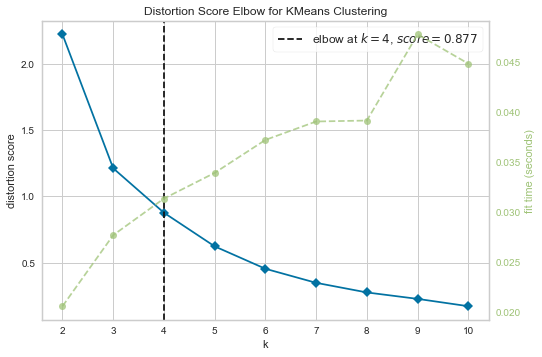

In [143]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(송파_df)
Elbow_M.show()

plt.show()

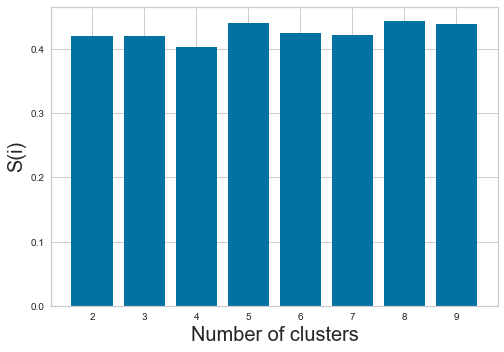

In [144]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(송파_df)
    silhouette_scores.append(silhouette_score(송파_df, m1.fit_predict(송파_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [145]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  8


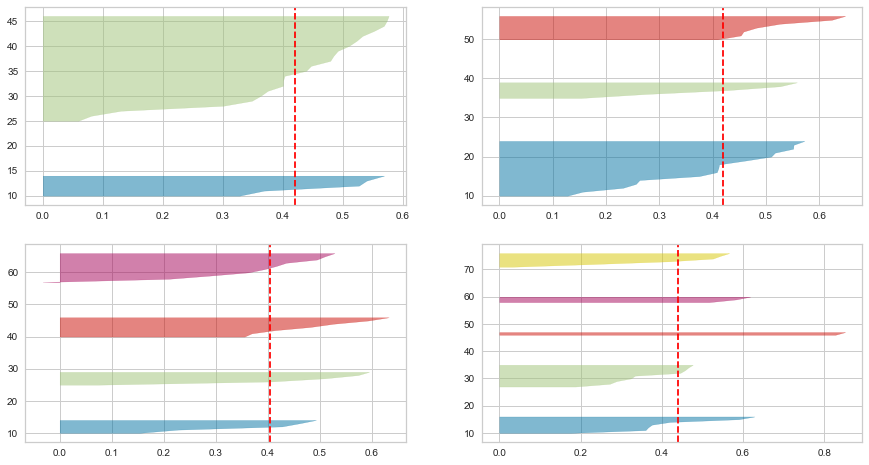

In [146]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(송파_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

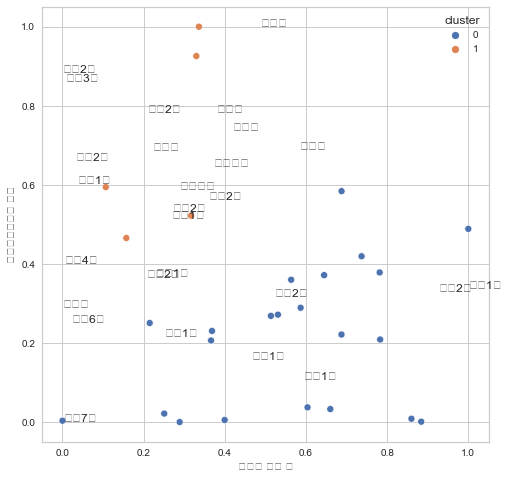

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

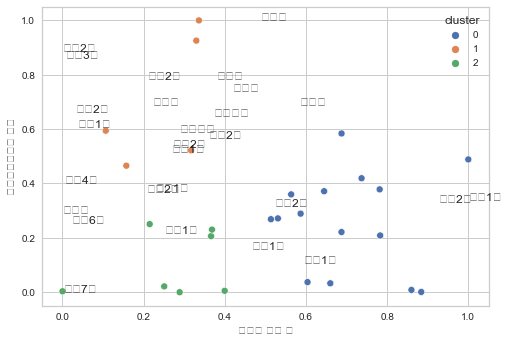

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

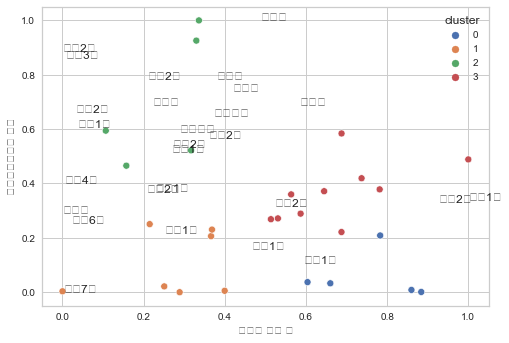

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

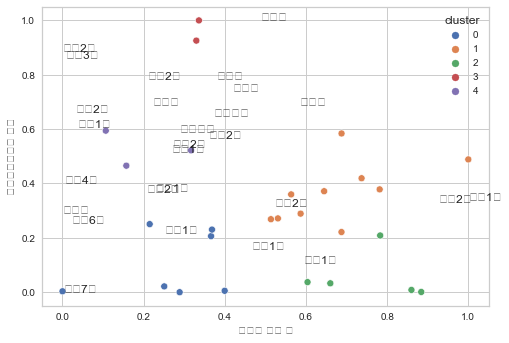

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

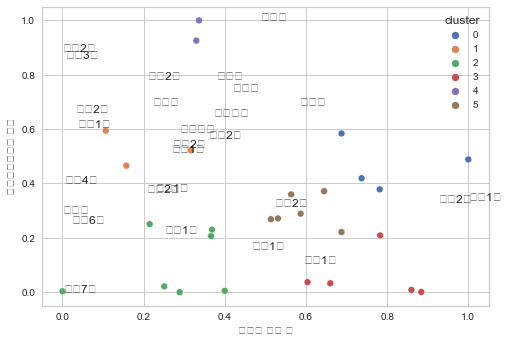

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

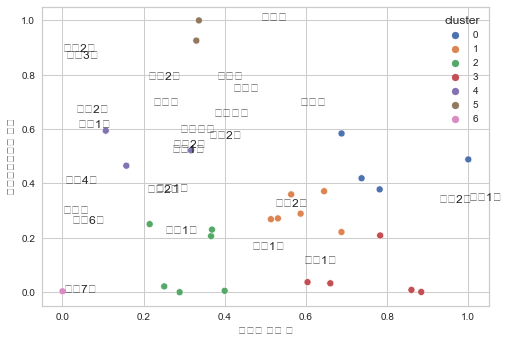

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

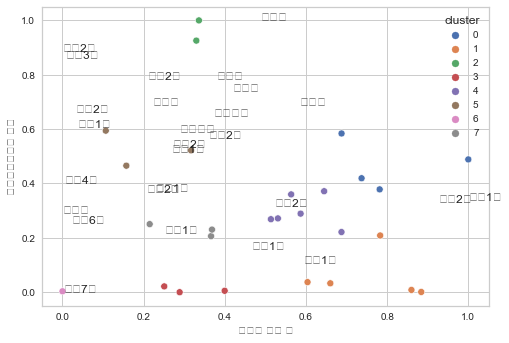

In [147]:
plt.figure(figsize = (8, 8))

for i in range(2,9):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(송파_df)
  송파_df['cluster'] = model.fit_predict(송파_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 송파_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 송파_df['생활보호대상자 비율']
  cluster_df['cluster'] = 송파_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('송파구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [148]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(송파_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
송파_df['cluster'] = model.fit_predict(송파_df)


In [149]:
송파_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
3    9
0    5
1    4
Name: cluster, dtype: int64

In [150]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.32099446, 0.39047392, 2.6       ],
       [0.23733412, 0.17264698, 6.75      ],
       [0.45638987, 0.37377557, 4.33333333],
       [0.77740822, 0.23979574, 0.55555556]])

In [151]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 송파_df['인구 수']
cluster_df['생활보호대상자 비율'] = 송파_df['생활보호대상자 비율']
cluster_df['cluster'] = 송파_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,풍납1동,0.157299,0.465521,2
1,풍납2동,0.530825,0.271603,2
2,거여1동,0.106635,0.594410,2
3,거여2동,0.316714,0.521952,2
4,마천1동,0.336167,1.000000,0
5,마천2동,0.329783,0.925694,0
6,방이1동,0.214850,0.250514,1
7,방이2동,0.563481,0.359906,2
8,오륜동,0.288661,0.000000,0
9,오금동,1.000000,0.488571,3


In [152]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,풍납1동,0.157299,0.465521,2
1,풍납2동,0.530825,0.271603,2
2,거여1동,0.106635,0.594410,2
3,거여2동,0.316714,0.521952,2
4,마천1동,0.336167,1.000000,0
5,마천2동,0.329783,0.925694,0
6,방이1동,0.214850,0.250514,1
7,방이2동,0.563481,0.359906,2
8,오륜동,0.288661,0.000000,0
9,오금동,1.000000,0.488571,3


In [153]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/송파_cluster.csv')

#### 6-1. 군집화

In [154]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['마천1동', '마천2동', '오륜동', '잠실4동', '잠실6동']
cluster 1 :  ['방이1동', '송파2동', '문정1동', '잠실7동']
cluster 2 :  ['풍납1동', '풍납2동', '거여1동', '거여2동', '방이2동', '송파1동', '가락본동', '잠실본동', '위례동']
cluster 3 :  ['오금동', '석촌동', '삼전동', '가락1동', '가락2동', '문정2동', '장지동', '잠실2동', '잠실3동']


#### 6-2. 클러스터별 인구수, 체육시설 수

In [155]:
# 클러스터별로 인구 수 합치기

송파_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/송파구_인구수, 수급인구비율.csv', index_col=0)
송파_peo_df = 송파_peo_df[['동', '인구 수']]
송파_peo_df = 송파_peo_df.rename(columns={'동':'dong'})
송파_peo_df

,dong,인구 수
0,풍납1동,14585.0
1,풍납2동,25703.0
2,거여1동,13077.0
3,거여2동,19330.0
4,마천1동,19909.0
5,마천2동,19719.0
6,방이1동,16298.0
7,방이2동,26675.0
8,오륜동,18495.0
9,오금동,39668.0


In [156]:
df_all = pd.merge(cluster_df, 송파_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,풍납1동,0.157299,0.465521,2,14585.0
1,풍납2동,0.530825,0.271603,2,25703.0
2,거여1동,0.106635,0.594410,2,13077.0
3,거여2동,0.316714,0.521952,2,19330.0
4,마천1동,0.336167,1.000000,0,19909.0
5,마천2동,0.329783,0.925694,0,19719.0
6,방이1동,0.214850,0.250514,1,16298.0
7,방이2동,0.563481,0.359906,2,26675.0
8,오륜동,0.288661,0.000000,0,18495.0
9,오금동,1.000000,0.488571,3,39668.0


In [157]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  97287.0
cluster 1 :  67869.0
cluster 2 :  211387.0
cluster 3 :  297383.0


In [158]:
# a+b+c+d=14

def prop(a, b, c, d):
  
  p1 = a*10000/97287
  p2 = b*10000/67869
  p3 = c*10000/211387
  p4 = d*10000/297383

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [159]:
lst = []

for i, j, k, l in product(range(15), range(15), range(15), range(15)):
  if (i+j+k+l==14):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [160]:
lst.sort()
lst

[[0.016183991916202203, (2, 1, 4, 7)],
 [0.016489419154215368, (2, 1, 5, 6)],
 [0.02813596627726045, (2, 2, 4, 6)],
 [0.03437616328608993, (2, 2, 5, 5)],
 [0.04245362156577955, (2, 1, 3, 8)],
 [0.043369903279819016, (2, 1, 6, 5)],
 [0.04847082615602147, (2, 2, 3, 7)],
 [0.05316282260274802, (1, 1, 5, 7)],
 [0.056360152697571185, (3, 1, 4, 6)],
 [0.060011156741521514, (1, 1, 4, 8)],
 [0.06162850099940329, (3, 2, 4, 5)],
 [0.06381934131237099, (3, 1, 5, 5)],
 [0.0671914171825099, (2, 2, 6, 4)],
 [0.07288954535156501, (1, 1, 6, 6)],
 [0.07480959950137767, (3, 2, 3, 6)],
 [0.07502245938501942, (3, 2, 5, 4)],
 [0.07547602097036187, (3, 1, 3, 7)],
 [0.07773319279384872, (1, 2, 5, 6)],
 [0.0786467571618059, (1, 2, 4, 7)],
 [0.09343454776788551, (1, 1, 3, 9)],
 [0.09529830810294737, (2, 1, 2, 9)],
 [0.095380742922373, (2, 2, 2, 8)],
 [0.09682544429301321, (2, 1, 7, 4)],
 [0.09785358681476128, (3, 1, 6, 4)],
 [0.10339468531348206, (1, 2, 6, 5)],
 [0.1061353784173536, (1, 2, 3, 8)],
 [0.11456575

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '마천1동', '마천2동', '오륜동', '잠실4동', '잠실6동' (2개)
- cluster1 : '방이1동', '송파2동', '문정1동', '잠실7동' (1개)
- cluster2 : '풍납1동', '풍납2동', '거여1동', '거여2동', '방이2동', '송파1동', '가락본동', '잠실본동', '위례동' (4개)
- cluster3 : '오금동', '석촌동', '삼전동', '가락1동', '가락2동', '문정2동', '장지동', '잠실2동', '잠실3동' (7개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 마천1동(1개) + 마천2동(0개) + 오륜동(2개) + 잠실4동(0개) + 잠실6동(2개) = 5개
- cluster1 : 방이1동(0개) + 송파2동(0개) + 문정1동(1개) + 잠실7동(0개) = 1개
- cluster2 : 풍납1동(0개) + 풍납2동(0개) + 거여1동(2개) + 거여2동(0개) + 방이2동(1개) + 송파1동(0개) + 가락본동(1개) + 잠실본동(0개) + 위례동(0개) = 4개
- cluster3 : 오금동(1개) + 석촌동(0개) + 삼전동(0개) + 가락1동(0개) + 가락2동(0개) + 문정2동(1개) + 장지동(1개) + 잠실2동(4개) + 잠실3동(2개) = 9개

#### 6-3. 입지선정
- cluster0 : 2개 (잠실6동, 오륜동)
- cluster1 : 1개 (방이1동)
- cluster2 : 4개 (방이2동, 송파1동, 풍납2동, 가락본동)
- cluster3 : 7개 (가락2동, 석촌동, 삼전동, 문정2동, 잠실3동, 잠실2동, 가락1동)

In [161]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.3717522352506103, 4],
 [0.2865377095446248, 5],
 [0.15351532434270523, 8],
 [0.15457384190000742, 23],
 [0.1411405452855049, 24]]

In [162]:
lst.sort()
lst

[[0.1411405452855049, 24],
 [0.15351532434270523, 8],
 [0.15457384190000742, 23],
 [0.2865377095446248, 5],
 [0.3717522352506103, 4]]

In [163]:
cluster_df.loc[[24, 8]]

,dong,population,ratio,cluster
24,잠실6동,0.250731,0.021416,0
8,오륜동,0.288661,0.000000,0


In [164]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.006568845116191356, 6],
 [0.01771335984274249, 11],
 [0.02051108670778349, 17],
 [0.08498375678916952, 25]]

In [165]:
lst.sort()
lst

[[0.006568845116191356, 6],
 [0.01771335984274249, 11],
 [0.02051108670778349, 17],
 [0.08498375678916952, 25]]

In [166]:
cluster_df.loc[[6]]

,dong,population,ratio,cluster
6,방이1동,0.21485,0.250514,1


In [167]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.09787269286135437, 0],
 [0.015979718082830927, 1],
 [0.17100759958147252, 2],
 [0.041465609431349956, 3],
 [0.011660783792196677, 7],
 [0.014340020377602984, 10],
 [0.024167941611037906, 14],
 [0.03547198602451855, 20],
 [0.07663567477267899, 26]]

In [168]:
lst.sort()
lst

[[0.011660783792196677, 7],
 [0.014340020377602984, 10],
 [0.015979718082830927, 1],
 [0.024167941611037906, 14],
 [0.03547198602451855, 20],
 [0.041465609431349956, 3],
 [0.07663567477267899, 26],
 [0.09787269286135437, 0],
 [0.17100759958147252, 2]]

In [169]:
cluster_df.loc[[7, 10, 1, 14]]

,dong,population,ratio,cluster
7,방이2동,0.563481,0.359906,2
10,송파1동,0.513590,0.268570,2
1,풍납2동,0.530825,0.271603,2
14,가락본동,0.586763,0.289095,2


In [170]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.11143608539093822, 9],
 [0.019219868811127503, 12],
 [0.03385271918623924, 13],
 [0.0712120192362775, 15],
 [0.0009939423721651256, 16],
 [0.05664672900760074, 18],
 [0.12656289809130922, 19],
 [0.06844100267811393, 21],
 [0.06035507265317518, 22]]

In [171]:
lst.sort()
lst

[[0.0009939423721651256, 16],
 [0.019219868811127503, 12],
 [0.03385271918623924, 13],
 [0.05664672900760074, 18],
 [0.06035507265317518, 22],
 [0.06844100267811393, 21],
 [0.0712120192362775, 15],
 [0.11143608539093822, 9],
 [0.12656289809130922, 19]]

In [172]:
cluster_df.loc[[16, 12, 13, 18, 22, 21, 15]]

,dong,population,ratio,cluster
16,가락2동,0.782832,0.208739,3
12,석촌동,0.781556,0.378369,3
13,삼전동,0.736973,0.419289,3
18,문정2동,0.659970,0.032781,3
22,잠실3동,0.859869,0.008376,3
21,잠실2동,0.884025,0.000894,3
15,가락1동,0.603830,0.037107,3


### 7. 강남구

In [173]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

강남_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/강남구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =강남_df['동']
강남_df = 강남_df.iloc[:,2:]
강남_df = 강남_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
강남_df

,인구 수,생활보호대상자 비율
0,0.270969,0.052488
1,0.496125,0.033705
2,0.451369,0.146521
3,0.405423,0.096038
4,0.183309,0.046273
5,0.626848,0.068724
6,0.482793,0.000000
7,0.822166,0.016618
8,0.372279,0.120814
9,0.796217,0.109162


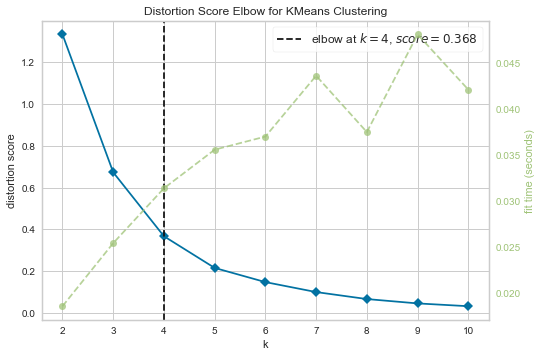

In [174]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(강남_df)
Elbow_M.show()

plt.show()

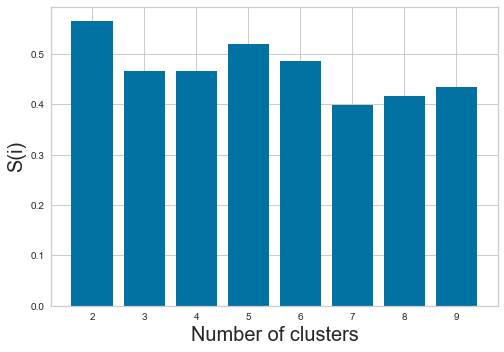

In [175]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(강남_df)
    silhouette_scores.append(silhouette_score(강남_df, m1.fit_predict(강남_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [176]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


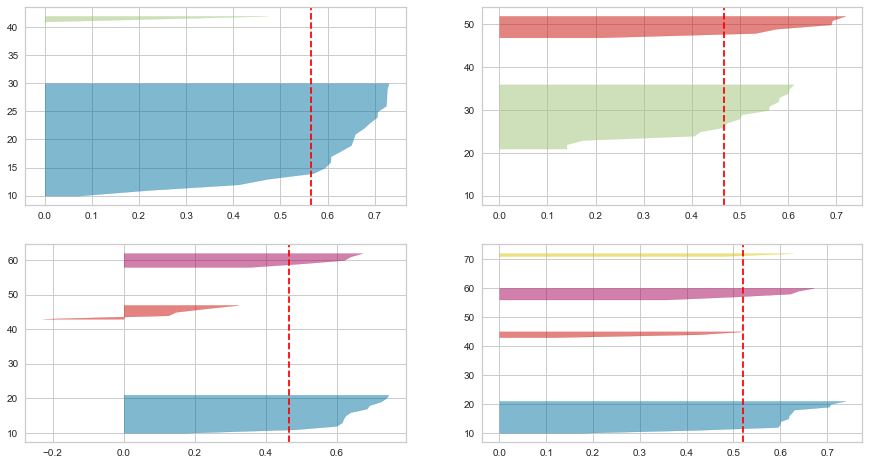

In [177]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(강남_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

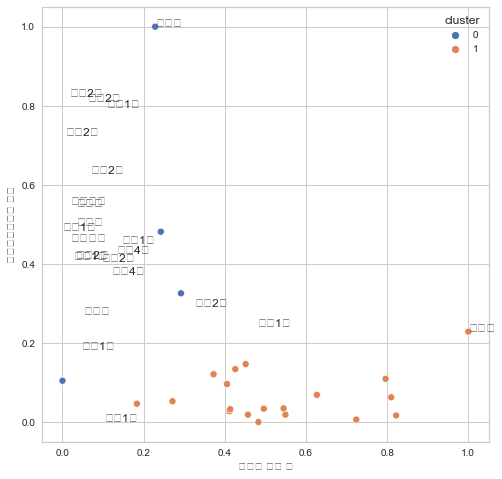

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

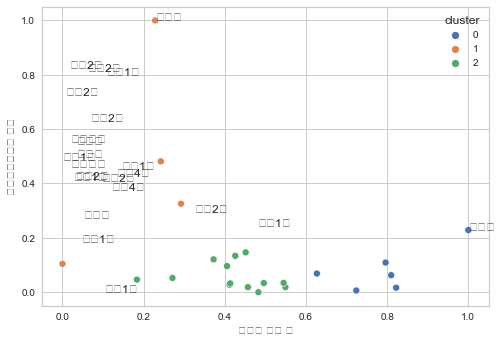

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

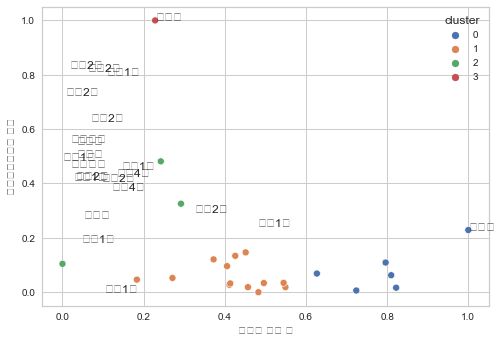

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

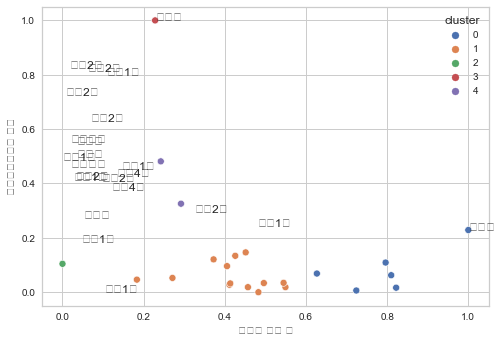

In [178]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(강남_df)
  강남_df['cluster'] = model.fit_predict(강남_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 강남_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 강남_df['생활보호대상자 비율']
  cluster_df['cluster'] = 강남_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('강남구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [179]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(강남_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
강남_df['cluster'] = model.fit_predict(강남_df)

In [180]:
강남_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

1    13
2     6
0     3
3     1
Name: cluster, dtype: int64

In [181]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[2.54155094e-01, 6.02374921e-01, 3.66666667e+00],
       [4.20308669e-01, 5.85557971e-02, 1.00000000e+00],
       [7.96539258e-01, 8.20122582e-02, 2.22044605e-16],
       [0.00000000e+00, 1.04511195e-01, 2.00000000e+00]])

In [182]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 강남_df['인구 수']
cluster_df['생활보호대상자 비율'] = 강남_df['생활보호대상자 비율']
cluster_df['cluster'] = 강남_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,신사동,0.270969,0.052488,1
1,신사동,0.496125,0.033705,1
2,논현1동,0.451369,0.146521,1
3,논현2동,0.405423,0.096038,1
4,삼성1동,0.183309,0.046273,1
5,삼성2동,0.626848,0.068724,2
6,대치1동,0.482793,0.000000,1
7,대치2동,0.822166,0.016618,2
8,대치4동,0.372279,0.120814,1
9,역삼1동,0.796217,0.109162,2


In [183]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,신사동,0.270969,0.052488,1
1,신사동,0.496125,0.033705,1
2,논현1동,0.451369,0.146521,1
3,논현2동,0.405423,0.096038,1
4,삼성1동,0.183309,0.046273,1
5,삼성2동,0.626848,0.068724,2
6,대치1동,0.482793,0.000000,1
7,대치2동,0.822166,0.016618,2
8,대치4동,0.372279,0.120814,1
9,역삼1동,0.796217,0.109162,2


In [184]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/강남_cluster.csv')

#### 7-1. 군집화

In [185]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['일원1동', '일원2동', '수서동']
cluster 1 :  ['신사동', '신사동', '논현1동', '논현2동', '삼성1동', '대치1동', '대치4동', '도곡1동', '개포2동', '개포4동', '일원본동', '압구정동', '청담동']
cluster 2 :  ['삼성2동', '대치2동', '역삼1동', '역삼2동', '도곡2동', '세곡동']
cluster 3 :  ['개포1동']


#### 7-2. 클러스터별 인구수, 체육시설 수

In [186]:
# 클러스터별로 인구 수 합치기

강남_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/강남구_인구수, 수급인구비율.csv', index_col=0)
강남_peo_df = 강남_peo_df[['동', '인구 수']]
강남_peo_df = 강남_peo_df.rename(columns={'동':'dong'})
강남_peo_df

,dong,인구 수
0,신사동,16914.0
1,신사동,25426.0
2,논현1동,23734.0
3,논현2동,21997.0
4,삼성1동,13600.0
5,삼성2동,30368.0
6,대치1동,24922.0
7,대치2동,37752.0
8,대치4동,20744.0
9,역삼1동,36771.0


In [187]:
df_all = pd.merge(cluster_df, 강남_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,신사동,0.270969,0.052488,1,16914.0
1,신사동,0.270969,0.052488,1,25426.0
2,신사동,0.496125,0.033705,1,16914.0
3,신사동,0.496125,0.033705,1,25426.0
4,논현1동,0.451369,0.146521,1,23734.0
5,논현2동,0.405423,0.096038,1,21997.0
6,삼성1동,0.183309,0.046273,1,13600.0
7,삼성2동,0.626848,0.068724,2,30368.0
8,대치1동,0.482793,0.000000,1,24922.0
9,대치2동,0.822166,0.016618,2,37752.0


In [188]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  48835.0
cluster 1 :  335617.0
cluster 2 :  220699.0
cluster 3 :  6670.0


In [189]:
# a+b+c+d=12

def prop(a, b, c, d):
  
  p1 = a*10000/48835
  p2 = b*10000/335617
  p3 = c*10000/220699
  p4 = d*10000/6670

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [190]:
lst = []

for i, j, k, l in product(range(13), range(13), range(13), range(13)):
  if (i+j+k+l==12):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [191]:
lst.sort()
lst

[[0.11959681367272104, (1, 7, 4, 0)],
 [0.1286509691904826, (1, 6, 5, 0)],
 [0.13358798604343677, (1, 8, 3, 0)],
 [0.16075045259672144, (1, 5, 6, 0)],
 [0.1706244863026298, (1, 9, 2, 0)],
 [0.18259838745274232, (0, 8, 4, 0)],
 [0.18997957580147462, (0, 7, 5, 0)],
 [0.1982625269924873, (0, 9, 3, 0)],
 [0.21589526389143757, (1, 4, 7, 0)],
 [0.2204060920386842, (0, 6, 6, 0)],
 [0.23070631445030002, (1, 10, 1, 0)],
 [0.23697199442070957, (0, 10, 2, 0)],
 [0.27387793616437106, (0, 5, 7, 0)],
 [0.29408540307463094, (1, 3, 8, 0)],
 [0.29872678973740907, (0, 11, 1, 0)],
 [0.3138334704864476, (1, 11, 0, 0)],
 [0.3379147297837983, (2, 6, 4, 0)],
 [0.3486418524705891, (2, 5, 5, 0)],
 [0.35023293498548475, (2, 7, 3, 0)],
 [0.3503951081785352, (0, 4, 8, 0)],
 [0.3824143030458571, (2, 4, 6, 0)],
 [0.3835269129425859, (0, 12, 0, 0)],
 [0.3855964680756484, (2, 8, 2, 0)],
 [0.3953208701463017, (1, 2, 9, 0)],
 [0.43923208150960263, (2, 3, 7, 0)],
 [0.44400532905428947, (2, 9, 1, 0)],
 [0.449957608081176

#### **공공체육시설 입지 선정 모델 결과**
- cluster0 : '일원1동', '일원2동', '수서동' (1개)
- cluster1 : '신사동', '신사동', '논현1동', '논현2동', '삼성1동', '대치1동', '대치4동', '도곡1동', '개포2동', '개포4동', '일원본동', '압구정동', '청담동' (7개)
- cluster2 : '삼성2동', '대치2동', '역삼1동', '역삼2동', '도곡2동', '세곡동' (4개)
- cluster3 : '개포1동' (0개)

#### **2020년 기준 서대문구 공공체육시설 설치 개수**
- cluster0 : 일원1동(2개) + 일원2동(3개) + 수서동(2개) = 6개
- cluster1 : 신사동(2개) + 논현1동(1개) + 논현2동(1개) + 삼성1동(3개) + 대치1동(0개) + 대치4동(2개) + 도곡1동(1개) + 개포2동(0개) + 개포4동(1개) + 일원본동(1개) + 압구정동(2개) + 청담동(3개) = 17개
- cluster2 : 삼성2동(0개) + 대치2동(2개) + 역삼1동(2개) + 역삼2동(3개) + 도곡2동(2개) + 세곡동(0개) = 9개
- cluster3 : 개포1동(0개) = 0개

#### 7-3. 입지선정
- cluster0 : 1개 (일원1동)
- cluster1 : 7개 (개포2동, 도곡1동, 논현2동, 일원본동, 개포4동, 대치4동, 신사동)
- cluster2 : 4개 (역삼2동, 역삼1동, 대치2동, 도곡2동)
- cluster3 : 0개 

In [192]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.014765213989862736, 17],
 [0.07799543554448493, 18],
 [0.1587767650512588, 19]]

In [193]:
lst.sort()
lst

[[0.014765213989862736, 17],
 [0.07799543554448493, 18],
 [0.1587767650512588, 19]]

In [194]:
cluster_df.loc[[17]]

,dong,population,ratio,cluster
17,일원1동,0.242217,0.481451,0


In [195]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.02233901794442585, 0],
 [0.006365632560491911, 1],
 [0.008702612397870794, 2],
 [0.0016265202824327757, 3],
 [0.05631966072017848, 4],
 [0.007333108152536417, 6],
 [0.0061829237546646995, 8],
 [0.001052147136387925, 11],
 [0.0007352539224962393, 14],
 [0.005712969935847791, 15],
 [0.002940971063614265, 16],
 [0.018253478452255428, 21],
 [0.016076020431881295, 22]]

In [196]:
lst.sort()
lst

[[0.0007352539224962393, 14],
 [0.001052147136387925, 11],
 [0.0016265202824327757, 3],
 [0.002940971063614265, 16],
 [0.005712969935847791, 15],
 [0.0061829237546646995, 8],
 [0.006365632560491911, 1],
 [0.007333108152536417, 6],
 [0.008702612397870794, 2],
 [0.016076020431881295, 22],
 [0.018253478452255428, 21],
 [0.02233901794442585, 0],
 [0.05631966072017848, 4]]

In [197]:
cluster_df.loc[[14, 11, 3, 16, 15, 8, 1]]

,dong,population,ratio,cluster
14,개포2동,0.413358,0.032346,1
11,도곡1동,0.411506,0.027336,1
3,논현2동,0.405423,0.096038,1
16,일원본동,0.456950,0.018576,1
15,개포4동,0.425737,0.133945,1
8,대치4동,0.372279,0.120814,1
1,신사동,0.496125,0.033705,1


In [198]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.028971595709723182, 5],
 [0.004933174344747587, 7],
 [0.0007371981597394892, 9],
 [0.0005593538873479866, 10],
 [0.010992978001056367, 12],
 [0.06292658500703187, 20]]

In [199]:
lst.sort()
lst

[[0.0005593538873479866, 10],
 [0.0007371981597394892, 9],
 [0.004933174344747587, 7],
 [0.010992978001056367, 12],
 [0.028971595709723182, 5],
 [0.06292658500703187, 20]]

In [200]:
cluster_df.loc[[10, 9, 7, 12]]

,dong,population,ratio,cluster
10,역삼2동,0.809972,0.062547,2
9,역삼1동,0.796217,0.109162,2
7,대치2동,0.822166,0.016618,2
12,도곡2동,0.724031,0.006279,2


In [201]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.0, 13]]

In [202]:
lst.sort()
lst

[[0.0, 13]]

In [203]:
cluster_df.loc[[13]]

,dong,population,ratio,cluster
13,개포1동,0.0,0.104511,3


### 8. 광진구

In [204]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

광진_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/광진구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =광진_df['동']
광진_df = 광진_df.iloc[:,2:]
광진_df = 광진_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
광진_df

,인구 수,생활보호대상자 비율
0,0.574876,0.282145
1,0.421412,0.523713
2,0.180418,0.769007
3,0.437526,0.533419
4,0.210453,1.000000
5,0.755167,0.702302
6,0.000000,0.339497
7,0.455032,0.561281
8,0.655151,0.543070
9,0.745592,0.191942


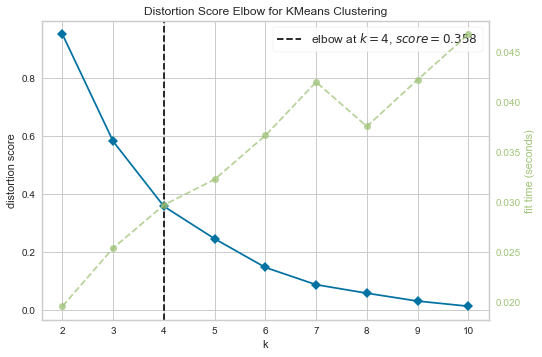

In [205]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(광진_df)
Elbow_M.show()

plt.show()

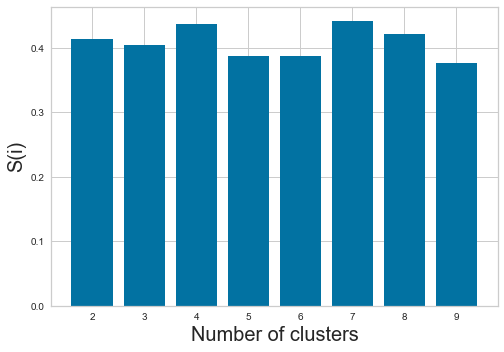

In [206]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(광진_df)
    silhouette_scores.append(silhouette_score(광진_df, m1.fit_predict(광진_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [207]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


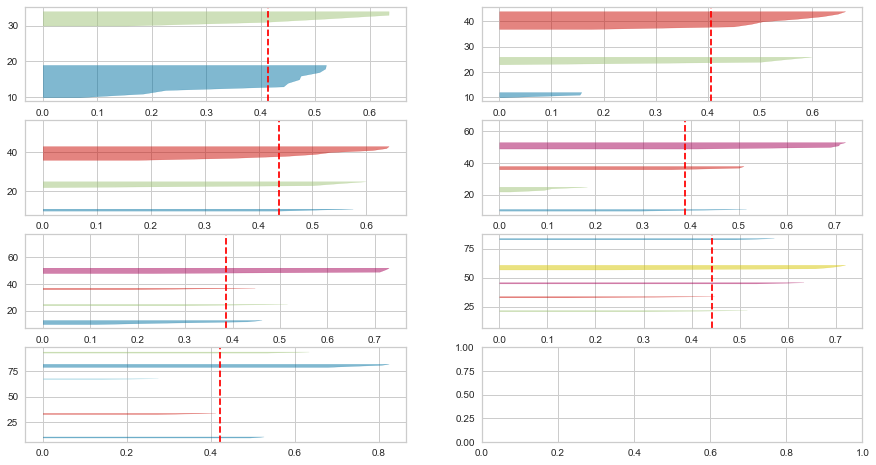

In [208]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(광진_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

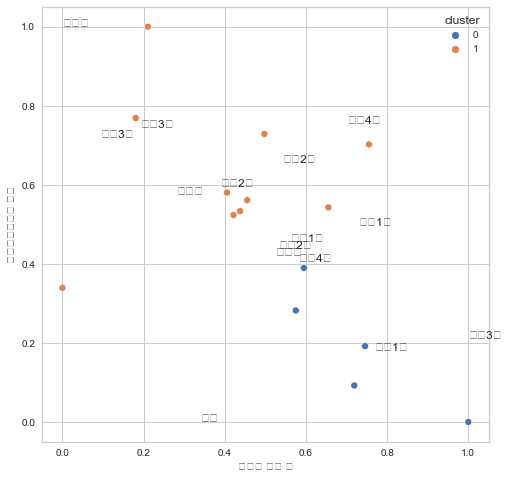

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

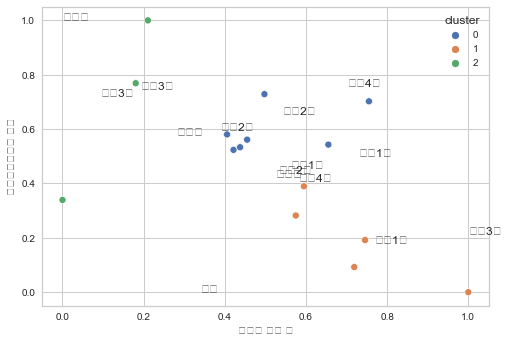

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

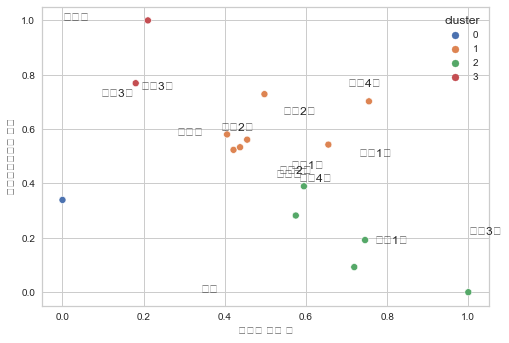

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

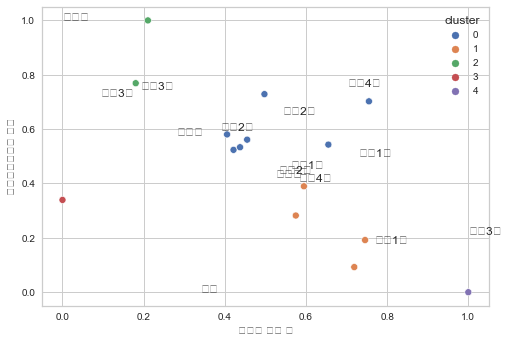

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

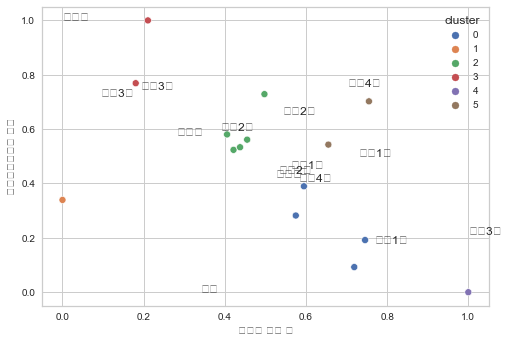

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5106

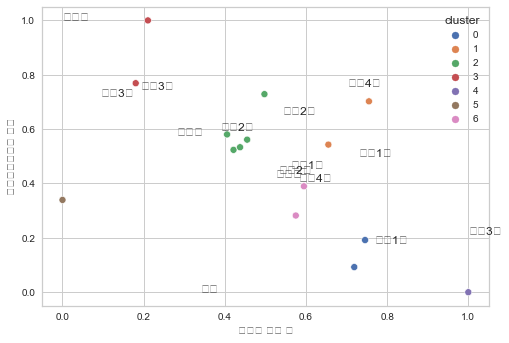

In [209]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(광진_df)
  광진_df['cluster'] = model.fit_predict(광진_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 광진_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
  cluster_df['cluster'] = 광진_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('광진구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [210]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(광진_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
광진_df['cluster'] = model.fit_predict(광진_df)

In [211]:
광진_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    7
0    4
1    3
3    1
Name: cluster, dtype: int64

In [212]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.718721  , 0.38244454, 0.5       ],
       [0.38992941, 0.33713591, 5.66666667],
       [0.37256993, 0.67095614, 2.28571429],
       [1.        , 0.        , 4.        ]])

In [213]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 광진_df['인구 수']
cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
cluster_df['cluster'] = 광진_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,화양동,0.574876,0.282145,1
1,군자동,0.421412,0.523713,2
2,중곡1동,0.180418,0.769007,2
3,중곡2동,0.437526,0.533419,2
4,중곡3동,0.210453,1.000000,2
5,중곡4동,0.755167,0.702302,0
6,능동,0.000000,0.339497,1
7,구의1동,0.455032,0.561281,2
8,구의2동,0.655151,0.543070,0
9,구의3동,0.745592,0.191942,0


In [214]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,화양동,0.574876,0.282145,1
1,군자동,0.421412,0.523713,2
2,중곡1동,0.180418,0.769007,2
3,중곡2동,0.437526,0.533419,2
4,중곡3동,0.210453,1.000000,2
5,중곡4동,0.755167,0.702302,0
6,능동,0.000000,0.339497,1
7,구의1동,0.455032,0.561281,2
8,구의2동,0.655151,0.543070,0
9,구의3동,0.745592,0.191942,0


In [215]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/광진_cluster.csv')

#### 8-1. 군집화

In [216]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['중곡4동', '구의2동', '구의3동', '자양3동']
cluster 1 :  ['화양동', '능동', '자양2동']
cluster 2 :  ['군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동']
cluster 3 :  ['광장동']


#### 8-2. 클러스터별 인구수, 체육시설 수

In [217]:
# 클러스터별로 인구 수 합치기

광진_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/광진구_인구수, 수급인구비율.csv', index_col=0)
광진_peo_df = 광진_peo_df[['동', '인구 수']]
광진_peo_df = 광진_peo_df.rename(columns={'동':'dong'})
광진_peo_df


df_all = pd.merge(cluster_df, 광진_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,화양동,0.574876,0.282145,1,25541.0
1,군자동,0.421412,0.523713,2,21903.0
2,중곡1동,0.180418,0.769007,2,16190.0
3,중곡2동,0.437526,0.533419,2,22285.0
4,중곡3동,0.210453,1.000000,2,16902.0
5,중곡4동,0.755167,0.702302,0,29815.0
6,능동,0.000000,0.339497,1,11913.0
7,구의1동,0.455032,0.561281,2,22700.0
8,구의2동,0.655151,0.543070,0,27444.0
9,구의3동,0.745592,0.191942,0,29588.0


In [218]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  115804.0
cluster 1 :  63470.0
cluster 2 :  145216.0
cluster 3 :  35619.0


In [219]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/115804.0
  p2 = b*10000/63470.0
  p3 = c*10000/145216.0
  p4 = d*10000/35619.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [220]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [221]:
lst.sort()
lst

[[0.03660744677432321, (3, 1, 3, 1)],
 [0.05155744638858562, (2, 2, 3, 1)],
 [0.05156429432393481, (2, 1, 4, 1)],
 [0.0714350133685609, (3, 2, 2, 1)],
 [0.1186300917477523, (4, 1, 2, 1)],
 [0.12865937193165103, (1, 2, 4, 1)],
 [0.16350063439658713, (1, 1, 5, 1)],
 [0.1882920728715769, (4, 2, 1, 1)],
 [0.19227985462423236, (3, 1, 4, 0)],
 [0.22257222950769565, (3, 0, 4, 1)],
 [0.2267557166105646, (3, 2, 3, 0)],
 [0.23740326053338523, (2, 2, 4, 0)],
 [0.2377618130766399, (2, 1, 5, 0)],
 [0.24377738869486565, (4, 1, 3, 0)],
 [0.2697604599515379, (4, 0, 3, 1)],
 [0.27234294778084667, (2, 3, 2, 1)],
 [0.2723634915868942, (2, 0, 5, 1)],
 [0.29763222924422217, (5, 1, 1, 1)],
 [0.3027407899977572, (0, 2, 5, 1)],
 [0.31308766521078474, (4, 2, 2, 0)],
 [0.3146104587943252, (1, 3, 3, 1)],
 [0.32705492929040875, (3, 3, 1, 1)],
 [0.3450302969792466, (1, 2, 5, 0)],
 [0.3724164669922801, (0, 1, 6, 1)],
 [0.3785963419655104, (3, 0, 5, 0)],
 [0.38022326405208806, (1, 1, 6, 0)],
 [0.39225441528853955, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '중곡4동', '구의2동', '구의3동', '자양3동' (3개)
- cluster 1 :  '화양동', '능동', '자양2동' (1개)
- cluster 2 :  '군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동' (3개)
- cluster 3 :  '광장동' (1개)

#### **2020년 기준 광진구 공공체육시설 설치 개수**
- cluster 0 :  구의2동(1개) + 구의3동(1개) + 자양3동(1개) = 3개
- cluster 1 :  자양2동(1개) = 1개
- cluster 2 :  중곡2동(1개) + 중곡3동(1개) = 2개
- cluster 3 :  광장동(3개) = 3개

#### 8-3. 입지선정

In [222]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.10363730926728854, 5],
 [0.029841863118181954, 8],
 [0.037013373838188854, 9],
 [0.08408889625651805, 13]]

In [223]:
lst.sort()
lst

[[0.029841863118181954, 8],
 [0.037013373838188854, 9],
 [0.08408889625651805, 13],
 [0.10363730926728854, 5]]

In [224]:
cluster_df.loc[[8, 9, 13]]

,dong,population,ratio,cluster
8,구의2동,0.655151,0.543070,0
9,구의3동,0.745592,0.191942,0
13,자양3동,0.718974,0.092464,0


In [225]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.03722907398044865, 0],
 [0.15205051979241904, 6],
 [0.044788082685090984, 12]]

In [226]:
lst.sort()
lst

[[0.03722907398044865, 0],
 [0.044788082685090984, 12],
 [0.15205051979241904, 6]]

In [227]:
cluster_df.loc[[0]]

,dong,population,ratio,cluster
0,화양동,0.574876,0.282145,1


In [228]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.02406620310750801, 1],
 [0.046536091541636335, 2],
 [0.02313571441293586, 3],
 [0.13455174535472103, 4],
 [0.01882860697223627, 7],
 [0.01898431086461284, 11],
 [0.009266659787774932, 14]]

In [229]:
lst.sort()
lst

[[0.009266659787774932, 14],
 [0.01882860697223627, 7],
 [0.01898431086461284, 11],
 [0.02313571441293586, 3],
 [0.02406620310750801, 1],
 [0.046536091541636335, 2],
 [0.13455174535472103, 4]]

In [230]:
cluster_df.loc[[14, 7, 11]]

,dong,population,ratio,cluster
14,자양4동,0.405509,0.580504,2
7,구의1동,0.455032,0.561281,2
11,자양1동,0.497638,0.728769,2


In [231]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.0, 10]]

In [232]:
lst.sort()
lst

[[0.0, 10]]

In [233]:
cluster_df.loc[[10]]

,dong,population,ratio,cluster
10,광장동,1.0,0.0,3


### 9. 서초구

In [234]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서초_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/서초구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서초_df['동']
서초_df = 서초_df.iloc[:,2:]
서초_df = 서초_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서초_df

,인구 수,생활보호대상자 비율
0,0.279522,0.315116
1,0.296058,0.100608
2,0.617526,0.226028
3,0.599623,0.029514
4,0.502781,0.176689
5,0.000000,0.064080
6,0.627344,0.235400
7,0.129153,0.000000
8,0.316757,0.024645
9,0.242743,0.090945


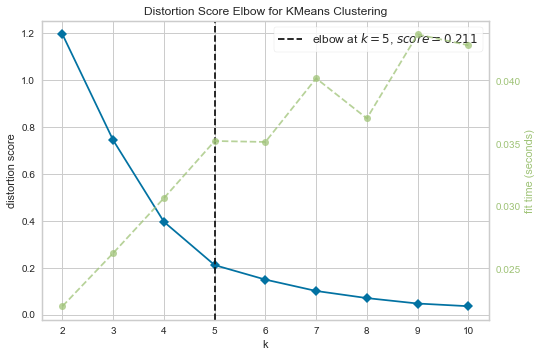

In [235]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서초_df)
Elbow_M.show()

plt.show()

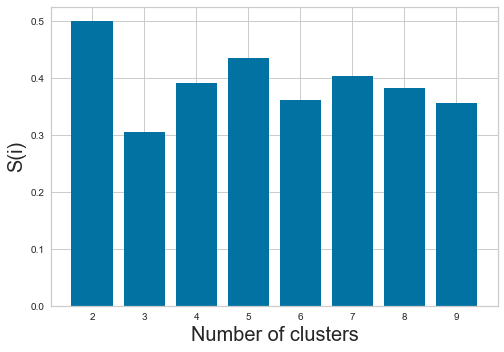

In [236]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서초_df)
    silhouette_scores.append(silhouette_score(서초_df, m1.fit_predict(서초_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [237]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


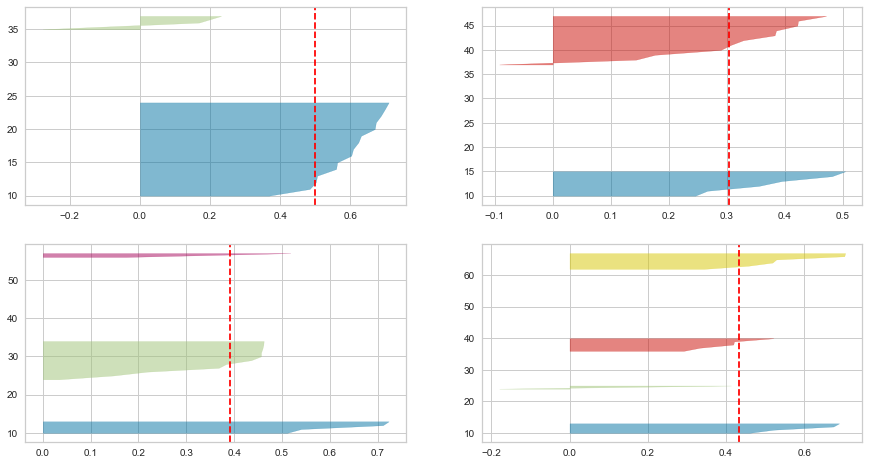

In [238]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서초_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (

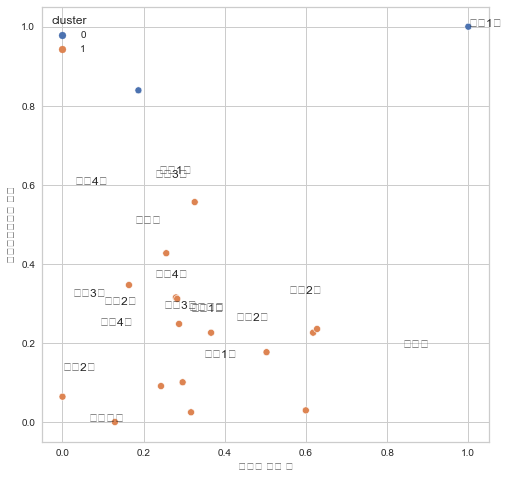

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (

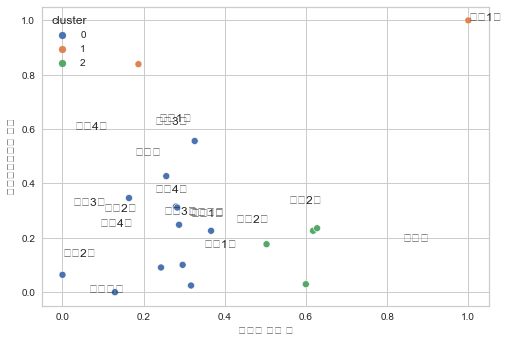

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (

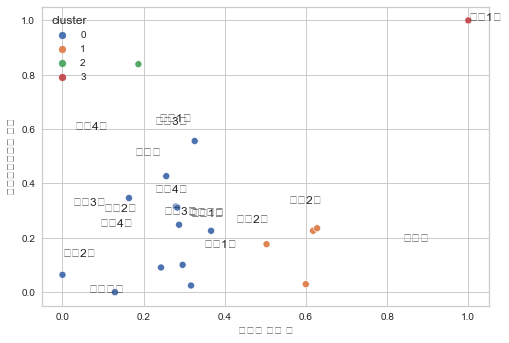

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (

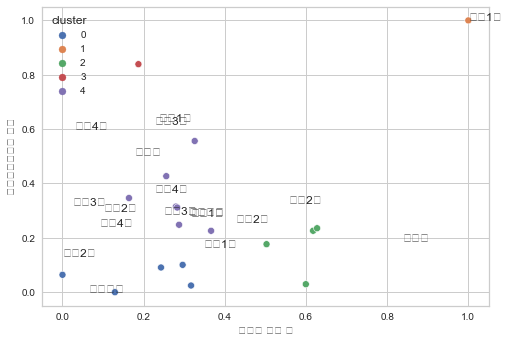

In [239]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서초_df)
  서초_df['cluster'] = model.fit_predict(서초_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서초_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서초_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서초구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [240]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서초_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서초_df['cluster'] = model.fit_predict(서초_df)

In [241]:
서초_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    7
1    5
2    4
3    1
4    1
Name: cluster, dtype: int64

In [242]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.28013878, 0.34723923, 4.        ],
       [0.19694216, 0.05605558, 0.        ],
       [0.58681875, 0.16690777, 2.        ],
       [1.        , 1.        , 1.        ],
       [0.18708775, 0.83901501, 3.        ]])

In [243]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서초_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
cluster_df['cluster'] = 서초_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,서초1동,0.279522,0.315116,0
1,서초2동,0.296058,0.100608,1
2,서초3동,0.617526,0.226028,2
3,서초4동,0.599623,0.029514,2
4,잠원동,0.502781,0.176689,2
5,반포본동,0.000000,0.064080,1
6,반포1동,0.627344,0.235400,2
7,반포2동,0.129153,0.000000,1
8,반포3동,0.316757,0.024645,1
9,반포4동,0.242743,0.090945,1


In [244]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,서초1동,0.279522,0.315116,0
1,서초2동,0.296058,0.100608,1
2,서초3동,0.617526,0.226028,2
3,서초4동,0.599623,0.029514,2
4,잠원동,0.502781,0.176689,2
5,반포본동,0.000000,0.064080,1
6,반포1동,0.627344,0.235400,2
7,반포2동,0.129153,0.000000,1
8,반포3동,0.316757,0.024645,1
9,반포4동,0.242743,0.090945,1


In [245]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/서초_cluster.csv')

In [246]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['서초1동', '방배본동', '방배1동', '방배2동', '방배3동', '방배4동', '양재2동']
cluster 1 :  ['서초2동', '반포본동', '반포2동', '반포3동', '반포4동']
cluster 2 :  ['서초3동', '서초4동', '잠원동', '반포1동']
cluster 3 :  ['양재1동']
cluster 4 :  ['내곡동']


### 10. 양천구

In [247]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

양천_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/양천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =양천_df['동']
양천_df = 양천_df.iloc[:,2:]
양천_df = 양천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
양천_df

,인구 수,생활보호대상자 비율
0,0.543484,0.100271
1,0.512504,0.319044
2,0.268120,0.483198
3,0.375640,0.389048
4,0.863621,0.000000
5,0.225772,0.905837
6,0.234078,0.366319
7,0.065689,1.000000
8,0.142138,0.214819
9,0.042166,0.513861


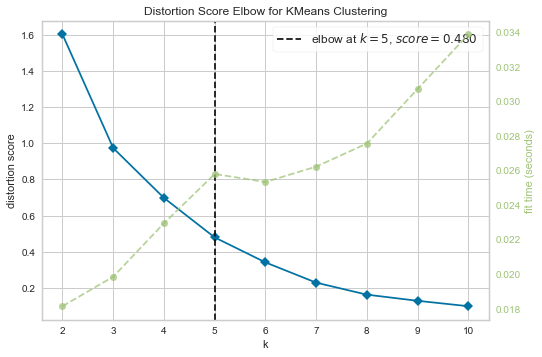

In [248]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(양천_df)
Elbow_M.show()

plt.show()

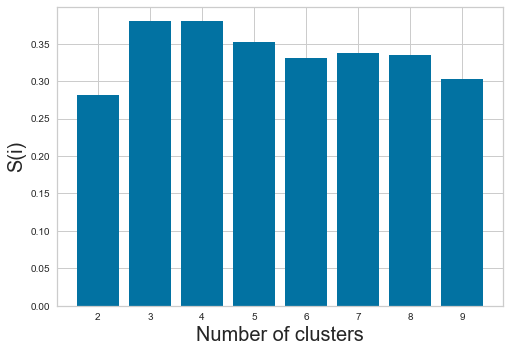

In [249]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(양천_df)
    silhouette_scores.append(silhouette_score(양천_df, m1.fit_predict(양천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [250]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


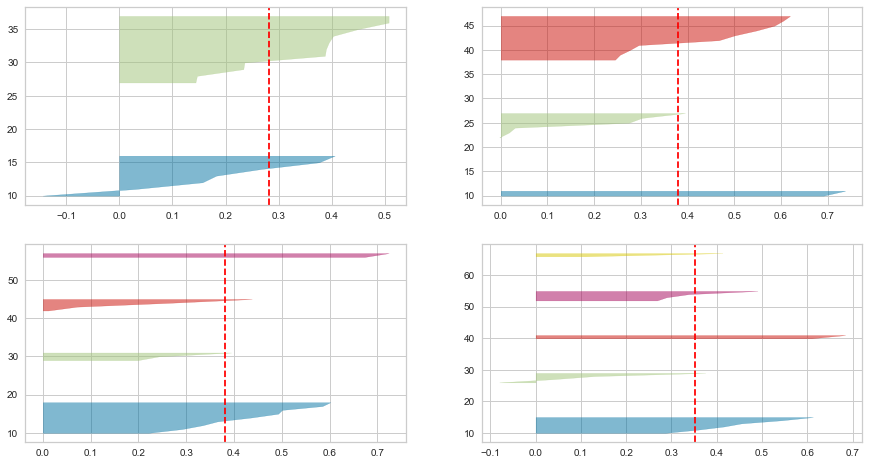

In [251]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(양천_df)

k=4

In [252]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(양천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
양천_df['cluster'] = model.fit_predict(양천_df)

In [253]:
양천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
1    4
3    3
0    2
Name: cluster, dtype: int64

In [254]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.14573039, 0.9529183 ],
       [0.5650823 , 0.10821718],
       [0.18719034, 0.34931309],
       [0.70386088, 0.54537367]])

In [255]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 양천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 양천_df['생활보호대상자 비율']
cluster_df['cluster'] = 양천_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,목1동,0.543484,0.100271,1
1,목2동,0.512504,0.319044,1
2,목3동,0.268120,0.483198,2
3,목4동,0.375640,0.389048,2
4,목5동,0.863621,0.000000,1
5,신월1동,0.225772,0.905837,0
6,신월2동,0.234078,0.366319,2
7,신월3동,0.065689,1.000000,0
8,신월4동,0.142138,0.214819,2
9,신월5동,0.042166,0.513861,2


In [256]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,목1동,0.543484,0.100271,1
1,목2동,0.512504,0.319044,1
2,목3동,0.268120,0.483198,2
3,목4동,0.375640,0.389048,2
4,목5동,0.863621,0.000000,1
5,신월1동,0.225772,0.905837,0
6,신월2동,0.234078,0.366319,2
7,신월3동,0.065689,1.000000,0
8,신월4동,0.142138,0.214819,2
9,신월5동,0.042166,0.513861,2


In [257]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/양천_cluster.csv')

#### 10-1. 군집화

In [258]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신월1동', '신월3동']
cluster 1 :  ['목1동', '목2동', '목5동', '신정6동']
cluster 2 :  ['목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동']
cluster 3 :  ['신정3동', '신정4동', '신정7동']


#### 10-2. 클러스터별 인구수, 체육시설 수

In [259]:
# 클러스터별로 인구 수 합치기

양천_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/양천구_인구수, 수급인구비율.csv', index_col=0)
양천_peo_df = 양천_peo_df[['동', '인구 수']]
양천_peo_df = 양천_peo_df.rename(columns={'동':'dong'})
양천_peo_df


df_all = pd.merge(cluster_df, 양천_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,목1동,0.543484,0.100271,1,31727.0
1,목2동,0.512504,0.319044,1,30705.0
2,목3동,0.268120,0.483198,2,22643.0
3,목4동,0.375640,0.389048,2,26190.0
4,목5동,0.863621,0.000000,1,42288.0
5,신월1동,0.225772,0.905837,0,21246.0
6,신월2동,0.234078,0.366319,2,21520.0
7,신월3동,0.065689,1.000000,0,15965.0
8,신월4동,0.142138,0.214819,2,18487.0
9,신월5동,0.042166,0.513861,2,15189.0


In [260]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  37211.0
cluster 1 :  129758.0
cluster 2 :  179759.0
cluster 3 :  111053.0


In [261]:
# a+b+c=11

def prop(a, b, c, d):
  
  p1 = a*10000/37211.0
  p2 = b*10000/129758.0
  p3 = c*10000/179759.0
  p4 = d*10000/111053.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [262]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [263]:
lst.sort()
lst

[[0.0074067045011526845, (1, 3, 4, 3)],
 [0.02378648398327754, (1, 3, 5, 2)],
 [0.03713663306285485, (1, 4, 4, 2)],
 [0.042127082580736455, (1, 2, 5, 3)],
 [0.0440389000441282, (1, 4, 3, 3)],
 [0.0782833004741943, (1, 3, 3, 4)],
 [0.08178890852625953, (1, 2, 6, 2)],
 [0.08972163209037985, (1, 2, 4, 4)],
 [0.11749074153674793, (1, 4, 5, 1)],
 [0.12183935576499147, (1, 5, 3, 2)],
 [0.12742263892056888, (1, 3, 6, 1)],
 [0.13819754248056804, (1, 4, 2, 4)],
 [0.14820003428287948, (1, 1, 6, 3)],
 [0.1520236692096631, (1, 5, 2, 3)],
 [0.17251253732912467, (1, 1, 5, 4)],
 [0.17891141777548636, (1, 5, 4, 1)],
 [0.20758205686523545, (0, 3, 5, 3)],
 [0.20870710992694907, (1, 2, 7, 1)],
 [0.21114390669180083, (1, 1, 7, 2)],
 [0.22457255705518964, (1, 2, 3, 5)],
 [0.22859321038243202, (0, 4, 4, 3)],
 [0.23177947280126804, (0, 4, 5, 2)],
 [0.23405036574746974, (0, 3, 6, 2)],
 [0.23641627190240228, (1, 3, 2, 5)],
 [0.2579234769705982, (0, 2, 6, 3)],
 [0.26837012343816774, (0, 3, 4, 4)],
 [0.269464358

#### **공공체육시설 입지 선정 모델 결과** 
- cluster 0 :  '신월1동', '신월3동' (1개)
- cluster 1 :  '목1동', '목2동', '목5동', '신정6동' (3개)
- cluster 2 :  '목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동' (4개)
- cluster 3 :  '신정3동', '신정4동', '신정7동' (3개)

#### **2020년 기준 양천구 공공체육시설 설치 개수**
- cluster 0 :  신월1동(1개) = 1개
- cluster 1 :  목1동(3개) + 목2동(1개) + 목5동(2개) + 신정6동(2개) = 8개
- cluster 2 :  신월7동(1개) + 신정1동(1개) + 신정2동(1개) = 3개
- cluster 3 :  신정3동(1개) + 신정4동(1개) = 2개

#### 10-3. 입지선정

In [264]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.00862338124192951, 5], [0.008623381241929528, 7]]

In [265]:
lst.sort()
lst

[[0.00862338124192951, 5], [0.008623381241929528, 7]]

In [266]:
cluster_df.loc[[5]]

,dong,population,ratio,cluster
5,신월1동,0.225772,0.905837,0


In [267]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.0005296274268058008, 0],
 [0.04721250928185185, 1],
 [0.10083643653667483, 4],
 [0.059299734882378496, 16]]

In [268]:
lst.sort()
lst

[[0.0005296274268058008, 0],
 [0.04721250928185185, 1],
 [0.059299734882378496, 16],
 [0.10083643653667483, 4]]

In [269]:
cluster_df.loc[[0, 1, 16]]

,dong,population,ratio,cluster
0,목1동,0.543484,0.100271,1
1,목2동,0.512504,0.319044,1
16,신정6동,0.340720,0.013554,1


In [270]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.02447484069531999, 2],
 [0.037092263931698705, 3],
 [0.0024876695460433157, 6],
 [0.020118423259951397, 8],
 [0.04810821499525833, 9],
 [0.07211803235305647, 10],
 [0.0442079115397648, 11],
 [0.05142835142445116, 12],
 [0.00022090526154035545, 13]]

In [271]:
lst.sort()
lst

[[0.00022090526154035545, 13],
 [0.0024876695460433157, 6],
 [0.020118423259951397, 8],
 [0.02447484069531999, 2],
 [0.037092263931698705, 3],
 [0.0442079115397648, 11],
 [0.04810821499525833, 9],
 [0.05142835142445116, 12],
 [0.07211803235305647, 10]]

In [272]:
cluster_df.loc[[13, 6, 8, 2]]

,dong,population,ratio,cluster
13,신정2동,0.194277,0.336248,2
6,신월2동,0.234078,0.366319,2
8,신월4동,0.142138,0.214819,2
2,목3동,0.268120,0.483198,2


In [273]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.0919673593365966, 14],
 [0.00784081002350611, 15],
 [0.051977406413914816, 17]]

In [274]:
lst.sort()
lst

[[0.00784081002350611, 15],
 [0.051977406413914816, 17],
 [0.0919673593365966, 14]]

In [275]:
cluster_df.loc[[15, 17, 14]]

,dong,population,ratio,cluster
15,신정4동,0.618176,0.523038,3
17,신정7동,0.493407,0.633046,3
14,신정3동,1.000000,0.480036,3


### 11. 영등포구

In [276]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

영등포_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/영등포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =영등포_df['동']
영등포_df = 영등포_df.iloc[:,2:]
영등포_df = 영등포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
영등포_df

,인구 수,생활보호대상자 비율
0,0.860945,0.000000
1,0.341015,0.377683
2,1.000000,0.047494
3,0.204037,0.228412
4,0.396120,0.127156
5,0.261454,0.707621
6,0.219087,0.760767
7,0.018734,0.916069
8,0.000000,0.736405
9,0.257692,0.378823


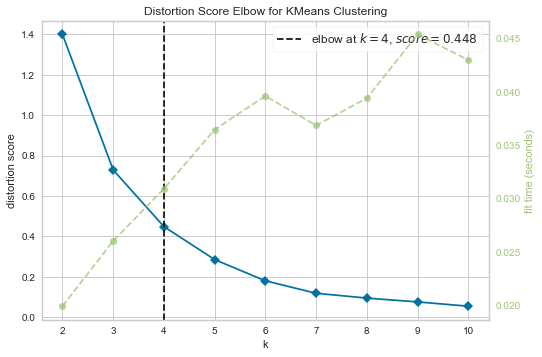

In [277]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(영등포_df)
Elbow_M.show()

plt.show()

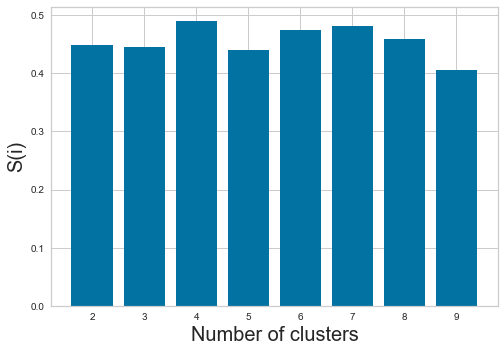

In [278]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(영등포_df)
    silhouette_scores.append(silhouette_score(영등포_df, m1.fit_predict(영등포_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [279]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


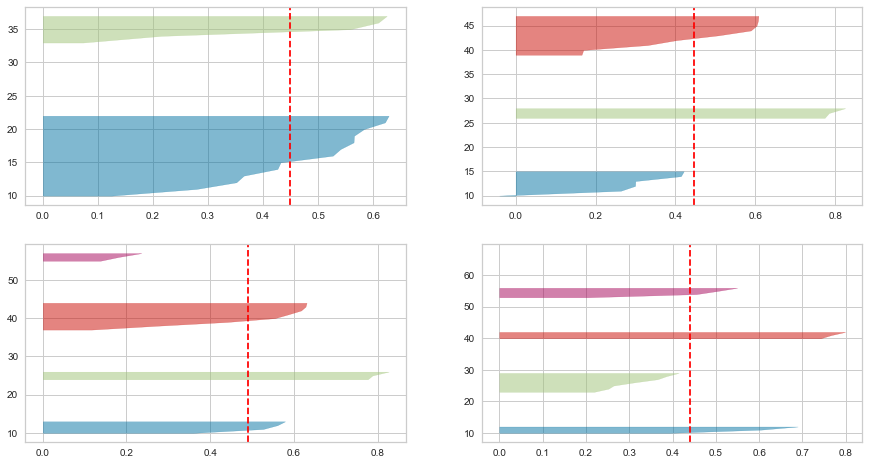

In [280]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(영등포_df)

k=4

In [281]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(영등포_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
영등포_df['cluster'] = model.fit_predict(영등포_df)

In [282]:
영등포_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

3    7
0    5
2    3
1    3
Name: cluster, dtype: int64

In [283]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.16388791, 0.73568134],
       [0.54901039, 0.72930332],
       [0.89339604, 0.04114993],
       [0.28622939, 0.30284943]])

In [284]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 영등포_df['인구 수']
cluster_df['생활보호대상자 비율'] = 영등포_df['생활보호대상자 비율']
cluster_df['cluster'] = 영등포_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,여의동,0.860945,0.000000,2
1,당산1동,0.341015,0.377683,3
2,당산2동,1.000000,0.047494,2
3,양평1동,0.204037,0.228412,3
4,양평2동,0.396120,0.127156,3
5,신길1동,0.261454,0.707621,0
6,신길3동,0.219087,0.760767,0
7,신길4동,0.018734,0.916069,0
8,신길5동,0.000000,0.736405,0
9,신길6동,0.257692,0.378823,3


In [285]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,여의동,0.860945,0.000000,2
1,당산1동,0.341015,0.377683,3
2,당산2동,1.000000,0.047494,2
3,양평1동,0.204037,0.228412,3
4,양평2동,0.396120,0.127156,3
5,신길1동,0.261454,0.707621,0
6,신길3동,0.219087,0.760767,0
7,신길4동,0.018734,0.916069,0
8,신길5동,0.000000,0.736405,0
9,신길6동,0.257692,0.378823,3


In [286]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/영등포_cluster.csv')

#### 11-1. 군집화

In [287]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신길1동', '신길3동', '신길4동', '신길5동', '도림동']
cluster 1 :  ['대림3동', '영등포본동', '영등포동']
cluster 2 :  ['여의동', '당산2동', '문래동']
cluster 3 :  ['당산1동', '양평1동', '양평2동', '신길6동', '신길7동', '대림1동', '대림2동']


#### 11-2. 클러스터별 인구수, 체육시설 수

In [288]:
# 클러스터별로 인구 수 합치기

영등포_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/영등포구_인구수, 수급인구비율.csv', index_col=0)
영등포_peo_df = 영등포_peo_df[['동', '인구 수']]
영등포_peo_df = 영등포_peo_df.rename(columns={'동':'dong'})
영등포_peo_df


df_all = pd.merge(cluster_df, 영등포_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,여의동,0.860945,0.000000,2,34463.0
1,당산1동,0.341015,0.377683,3,21197.0
2,당산2동,1.000000,0.047494,2,38011.0
3,양평1동,0.204037,0.228412,3,17702.0
4,양평2동,0.396120,0.127156,3,22603.0
5,신길1동,0.261454,0.707621,0,19167.0
6,신길3동,0.219087,0.760767,0,18086.0
7,신길4동,0.018734,0.916069,0,12974.0
8,신길5동,0.000000,0.736405,0,12496.0
9,신길6동,0.257692,0.378823,3,19071.0


In [289]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  83388.0
cluster 1 :  79512.0
cluster 2 :  105873.0
cluster 3 :  138594.0


In [290]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/83388.0
  p2 = b*10000/79512.0
  p3 = c*10000/105873.0
  p4 = d*10000/138594.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [291]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [292]:
lst.sort()
lst

[[0.029125364358123473, (2, 1, 2, 3)],
 [0.029267750911140308, (2, 2, 2, 2)],
 [0.037312277612264334, (1, 2, 2, 3)],
 [0.06261219883208753, (2, 2, 1, 3)],
 [0.06854814572196166, (2, 1, 3, 2)],
 [0.07360101215295577, (1, 1, 3, 3)],
 [0.0736964800519315, (1, 1, 2, 4)],
 [0.0764743389157532, (1, 2, 3, 2)],
 [0.10172734148153526, (2, 1, 1, 4)],
 [0.10794806147744308, (2, 2, 3, 1)],
 [0.11017497479602548, (1, 2, 1, 4)],
 [0.13668833439323747, (3, 1, 2, 2)],
 [0.1633668938533043, (1, 3, 2, 2)],
 [0.1671835085970716, (3, 2, 1, 2)],
 [0.16977206225383532, (3, 1, 1, 3)],
 [0.17335730993893828, (3, 2, 2, 1)],
 [0.18553030274123006, (1, 1, 4, 2)],
 [0.18581670643815723, (1, 1, 1, 5)],
 [0.1859358748633469, (2, 3, 1, 2)],
 [0.19142179648581378, (2, 0, 2, 4)],
 [0.19158704864718737, (2, 0, 3, 3)],
 [0.19184895614486425, (2, 3, 2, 1)],
 [0.19697206183460084, (1, 3, 1, 3)],
 [0.1971347020829853, (0, 2, 3, 3)],
 [0.19749089004231038, (0, 2, 2, 4)],
 [0.20798140524028474, (2, 2, 0, 4)],
 [0.21562936501

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '신길1동', '신길3동', '신길4동', '신길5동', '도림동' (2개)
- cluster 1 :  '대림3동', '영등포본동', '영등포동' (1개)
- cluster 2 :  '여의동', '당산2동', '문래동' (2개)
- cluster 3 :  '당산1동', '양평1동', '양평2동', '신길6동', '신길7동', '대림1동', '대림2동' (3개)

#### **2020년 기준 영등포구 공공체육시설 설치 개수**
- cluster 0 : 신길1동(1개) + 신길5동(1개) = 2개
- cluster 1 : 0개
- cluster 2 : 여의동(5개) + 당산2동(1개) + 문래동(2개) = 8개
- cluster 3 : 0개

#### 11-3. 입지선정

In [293]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.010306512684477069, 5],
 [0.003676214555655648, 6],
 [0.05360935226115969, 7],
 [0.026859770953125302, 8],
 [0.056155381918544994, 16]]

In [294]:
lst.sort()
lst

[[0.003676214555655648, 6],
 [0.010306512684477069, 5],
 [0.026859770953125302, 8],
 [0.05360935226115969, 7],
 [0.056155381918544994, 16]]

In [295]:
cluster_df.loc[[6, 5]]

,dong,population,ratio,cluster
6,신길3동,0.219087,0.760767,0
5,신길1동,0.261454,0.707621,0


In [296]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.03745418587457315, 13],
 [0.01740467902427955, 14],
 [0.08101848568225606, 15]]

In [297]:
lst.sort()
lst

[[0.01740467902427955, 14],
 [0.03745418587457315, 13],
 [0.08101848568225606, 15]]

In [298]:
cluster_df.loc[[14]]

,dong,population,ratio,cluster
14,영등포본동,0.442642,0.651263,1


In [299]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.0027464163431470323, 0],
 [0.01140464804778108, 2],
 [0.0067100521539289705, 17]]

In [300]:
lst.sort()
lst

[[0.0027464163431470323, 0],
 [0.0067100521539289705, 17],
 [0.01140464804778108, 2]]

In [301]:
cluster_df.loc[[0, 17]]

,dong,population,ratio,cluster
0,여의동,0.860945,0.000000,2
17,문래동,0.819244,0.075956,2


In [302]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.008601504998890938, 1],
 [0.012296545088693565, 3],
 [0.04294411752755749, 4],
 [0.006586424602913606, 9],
 [0.03233726164046379, 10],
 [0.042409207768609056, 11],
 [0.007644702233531923, 12]]

In [303]:
lst.sort()
lst

[[0.006586424602913606, 9],
 [0.007644702233531923, 12],
 [0.008601504998890938, 1],
 [0.012296545088693565, 3],
 [0.03233726164046379, 10],
 [0.042409207768609056, 11],
 [0.04294411752755749, 4]]

In [304]:
cluster_df.loc[[9, 12, 1]]

,dong,population,ratio,cluster
9,신길6동,0.257692,0.378823,3
12,대림2동,0.285322,0.390279,3
1,당산1동,0.341015,0.377683,3


### 12. 용산구

In [305]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

용산_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/용산구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =용산_df['동']
용산_df = 용산_df.iloc[:,2:]
용산_df = 용산_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
용산_df

,인구 수,생활보호대상자 비율
0,0.483857,0.284081
1,0.151403,0.319897
2,0.000000,1.000000
3,0.413241,0.123170
4,0.298153,0.185907
5,0.106021,0.068172
6,0.208155,0.181712
7,1.000000,0.000000
8,0.033197,0.109059
9,0.031087,0.157028


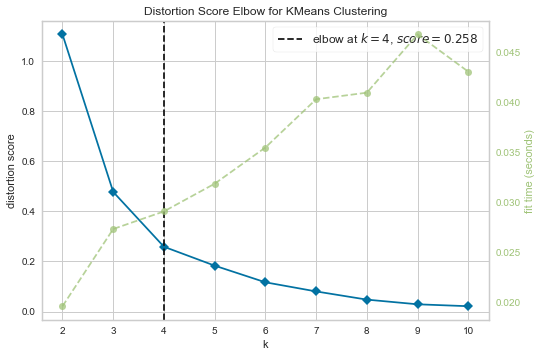

In [306]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(용산_df)
Elbow_M.show()

plt.show()

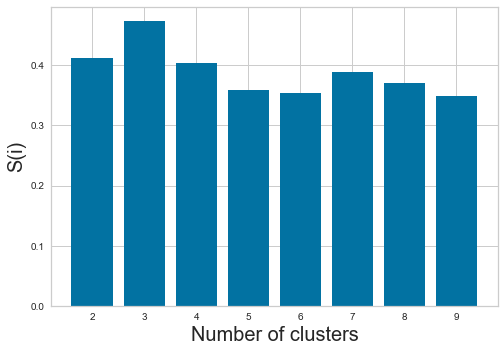

In [307]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(용산_df)
    silhouette_scores.append(silhouette_score(용산_df, m1.fit_predict(용산_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [308]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


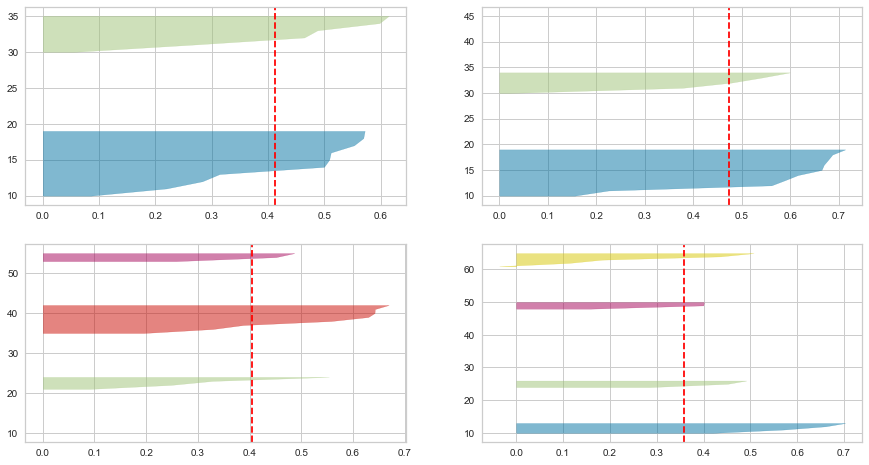

In [309]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(용산_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

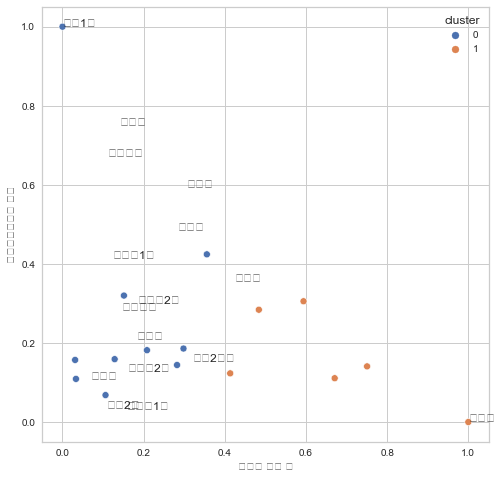

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

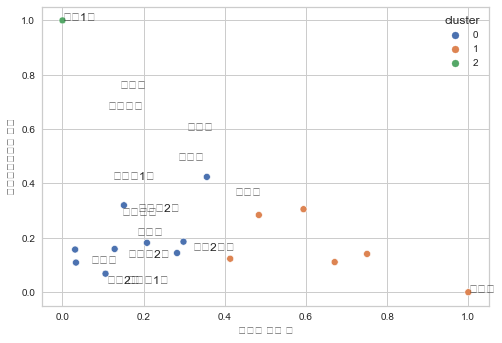

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

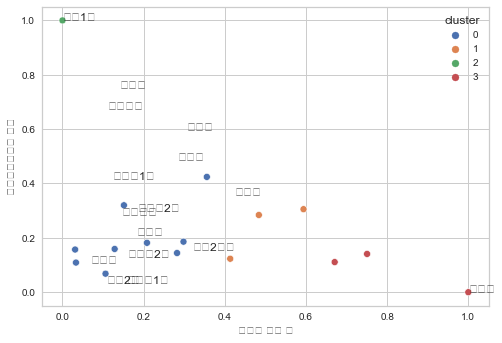

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064

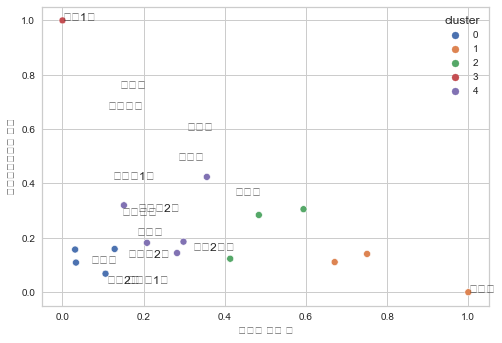

In [310]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(용산_df)
  용산_df['cluster'] = model.fit_predict(용산_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 용산_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 용산_df['생활보호대상자 비율']
  cluster_df['cluster'] = 용산_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('용산구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [311]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(용산_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
용산_df['cluster'] = model.fit_predict(용산_df)

In [312]:
용산_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    6
2    4
3    3
1    3
Name: cluster, dtype: int64

In [313]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.21595107, 0.37599059, 3.83333333],
       [0.80708403, 0.0838812 , 1.        ],
       [0.07470616, 0.12333163, 0.        ],
       [0.49700168, 0.23757968, 2.        ]])

In [314]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 용산_df['인구 수']
cluster_df['생활보호대상자 비율'] = 용산_df['생활보호대상자 비율']
cluster_df['cluster'] = 용산_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,후암동,0.483857,0.284081,3
1,용산2가동,0.151403,0.319897,0
2,남영동,0.000000,1.000000,0
3,원효로1동,0.413241,0.123170,3
4,원효로2동,0.298153,0.185907,0
5,효창동,0.106021,0.068172,2
6,용문동,0.208155,0.181712,0
7,이촌1동,1.000000,0.000000,1
8,이촌2동,0.033197,0.109059,2
9,이태원1동,0.031087,0.157028,2


In [315]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,후암동,0.483857,0.284081,3
1,용산2가동,0.151403,0.319897,0
2,남영동,0.000000,1.000000,0
3,원효로1동,0.413241,0.123170,3
4,원효로2동,0.298153,0.185907,0
5,효창동,0.106021,0.068172,2
6,용문동,0.208155,0.181712,0
7,이촌1동,1.000000,0.000000,1
8,이촌2동,0.033197,0.109059,2
9,이태원1동,0.031087,0.157028,2


In [316]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/용산_cluster.csv')

#### 12-1. 군집화

In [317]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['용산2가동', '남영동', '원효로2동', '용문동', '서빙고동', '보광동']
cluster 1 :  ['이촌1동', '한강로동', '한남동']
cluster 2 :  ['효창동', '이촌2동', '이태원1동', '이태원2동']
cluster 3 :  ['후암동', '원효로1동', '청파동']


#### 12-2. 클러스터별 인구수, 체육시설 수

In [318]:
# 클러스터별로 인구 수 합치기

용산_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/용산구_인구수, 수급인구비율.csv', index_col=0)
용산_peo_df = 용산_peo_df[['동', '인구 수']]
용산_peo_df = 용산_peo_df.rename(columns={'동':'dong'})
용산_peo_df


df_all = pd.merge(cluster_df, 용산_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,후암동,0.483857,0.284081,3,18202.0
1,용산2가동,0.151403,0.319897,0,11272.0
2,남영동,0.000000,1.000000,0,8116.0
3,원효로1동,0.413241,0.123170,3,16730.0
4,원효로2동,0.298153,0.185907,0,14331.0
5,효창동,0.106021,0.068172,2,10326.0
6,용문동,0.208155,0.181712,0,12455.0
7,이촌1동,1.000000,0.000000,1,28961.0
8,이촌2동,0.033197,0.109059,2,8808.0
9,이태원1동,0.031087,0.157028,2,8764.0


In [319]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  75705.0
cluster 1 :  74819.0
cluster 2 :  38693.0
cluster 3 :  55428.0


In [320]:
# a+b+c=5

def prop(a, b, c, d):
  
  p1 = a*10000/75705.0
  p2 = b*10000/74819.0
  p3 = c*10000/38693.0
  p4 = d*10000/55428.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [321]:
lst = []

for i, j, k, l in product(range(6), range(6), range(6), range(6)):
  if (i+j+k+l==5):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [322]:
lst.sort()
lst

[[0.047934948228209345, (2, 1, 1, 1)],
 [0.05030319016882026, (1, 2, 1, 1)],
 [0.14595010763365193, (1, 1, 1, 2)],
 [0.1883759559775764, (2, 2, 0, 1)],
 [0.20816342348020442, (2, 2, 1, 0)],
 [0.28663932064943226, (2, 0, 1, 2)],
 [0.2877528532378884, (0, 2, 1, 2)],
 [0.29583898767235517, (2, 1, 0, 2)],
 [0.2984513428667745, (1, 2, 0, 2)],
 [0.32519810444678265, (3, 1, 0, 1)],
 [0.32805866490761526, (3, 0, 1, 1)],
 [0.334045766128387, (1, 3, 0, 1)],
 [0.335163390729448, (0, 3, 1, 1)],
 [0.34522968520321906, (3, 1, 1, 0)],
 [0.3535891203772066, (1, 3, 1, 0)],
 [0.41267652490596596, (1, 1, 2, 1)],
 [0.47361046546883073, (3, 2, 0, 0)],
 [0.47984577195601574, (2, 3, 0, 0)],
 [0.5536098511755547, (2, 0, 2, 1)],
 [0.554235157256394, (0, 2, 2, 1)],
 [0.5757185910979528, (3, 0, 0, 2)],
 [0.5825969857011056, (2, 1, 2, 0)],
 [0.5835556566812106, (0, 3, 0, 2)],
 [0.5847211143879081, (1, 2, 2, 0)],
 [0.6380659604912786, (0, 1, 2, 2)],
 [0.6392751634195469, (0, 1, 1, 3)],
 [0.6395647830972419, (1, 0,

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 : '용산2가동', '남영동', '원효로2동', '용문동', '서빙고동', '보광동' (2개)
- cluster 1 : '이촌1동', '한강로동', '한남동' (1개)
- cluster 2 : '효창동', '이촌2동', '이태원1동', '이태원2동' (1개)
- cluster 3 : '후암동', '원효로1동', '청파동' (1개)

#### **2020년 기준 용산구 공공체육시설 설치 개수**
- cluster 0 : 원효로2동(1개) = 1개
- cluster 1 : 이촌1동(1개) + 한강로동(1개) + 한남동(3개) = 5개
- cluster 2 : 이태원1동(1개) = 1개
- cluster 3 : 후암동(1개) + 원효로1동(1개) = 2개

#### 12-3. 입지선정

In [323]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.0073129631051790656, 1],
 [0.43602260315053126, 2],
 [0.042888928517183074, 4],
 [0.03780513203137026, 6],
 [0.05811089714279685, 11],
 [0.021859407823014133, 12]]

In [324]:
lst.sort()
lst

[[0.0073129631051790656, 1],
 [0.021859407823014133, 12],
 [0.03780513203137026, 6],
 [0.042888928517183074, 4],
 [0.05811089714279685, 11],
 [0.43602260315053126, 2]]

In [325]:
cluster_df.loc[[1, 12]]

,dong,population,ratio,cluster
1,용산2가동,0.151403,0.319897,0
12,보광동,0.355721,0.424197,0


In [326]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.044252626714060925, 7],
 [0.019324124950660854, 14],
 [0.006437155731508273, 15]]

In [327]:
lst.sort()
lst

[[0.006437155731508273, 15],
 [0.019324124950660854, 14],
 [0.044252626714060925, 7]]

In [328]:
cluster_df.loc[[15]]

,dong,population,ratio,cluster
15,한남동,0.75054,0.140801,1


In [329]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.004023185186839171, 5],
 [0.0019266816654852623, 8],
 [0.0030381132357186285, 9],
 [0.004172980482415087, 10]]

In [330]:
lst.sort()
lst

[[0.0019266816654852623, 8],
 [0.0030381132357186285, 9],
 [0.004023185186839171, 5],
 [0.004172980482415087, 10]]

In [331]:
cluster_df.loc[[8]]

,dong,population,ratio,cluster
8,이촌2동,0.033197,0.109059,2


In [332]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.002335123526643743, 0],
 [0.020105511998798814, 3],
 [0.014002321008369723, 13]]

In [333]:
lst.sort()
lst

[[0.002335123526643743, 0],
 [0.014002321008369723, 13],
 [0.020105511998798814, 3]]

In [334]:
cluster_df.loc[[0]]

,dong,population,ratio,cluster
0,후암동,0.483857,0.284081,3


### 13. 종로구

In [335]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

종로_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/종로구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =종로_df['동']
종로_df = 종로_df.iloc[:,2:]
종로_df = 종로_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
종로_df

,인구 수,생활보호대상자 비율
0,0.409926,0.067780
1,0.000000,0.078787
2,0.441248,0.083738
3,0.931530,0.000000
4,0.337771,0.125039
5,0.459138,0.154979
6,0.089688,0.099301
7,0.329212,1.000000
8,0.163269,0.516658
9,0.309183,0.299437


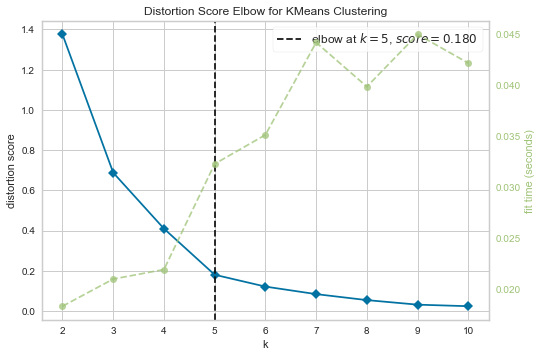

In [336]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(종로_df)
Elbow_M.show()

plt.show()

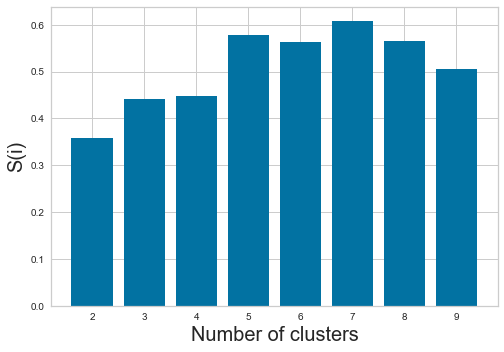

In [337]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(종로_df)
    silhouette_scores.append(silhouette_score(종로_df, m1.fit_predict(종로_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [338]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


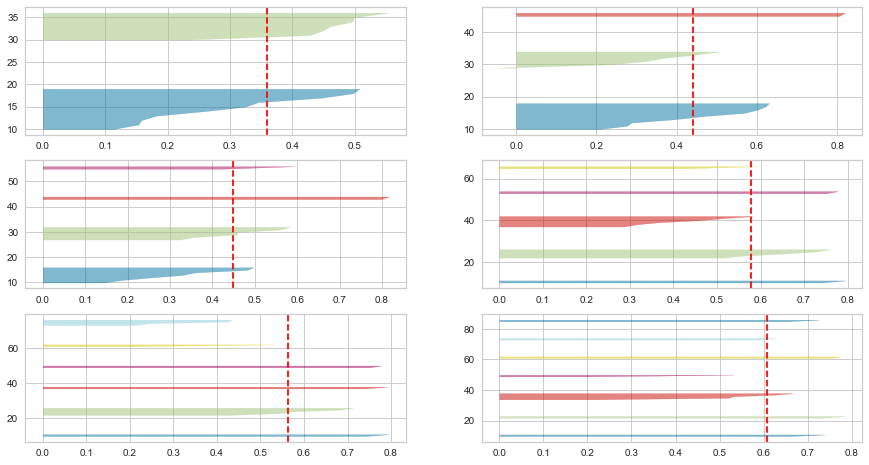

In [339]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(종로_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

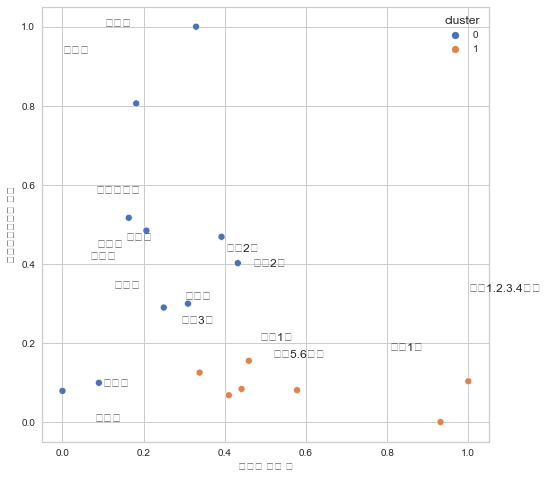

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

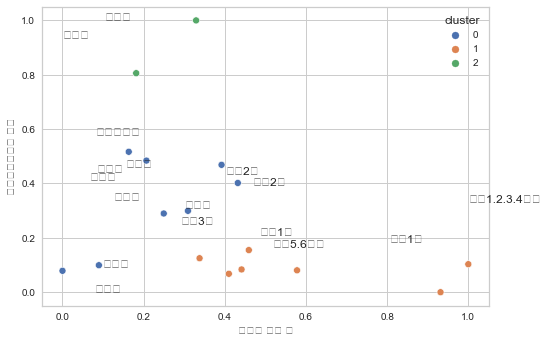

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

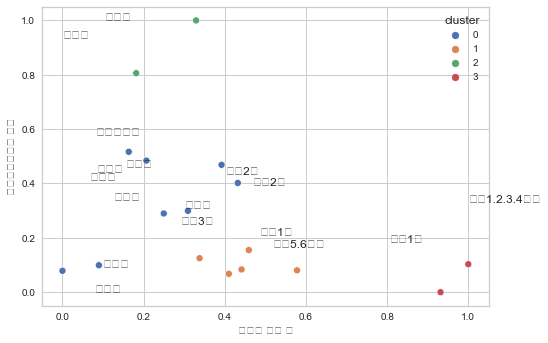

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

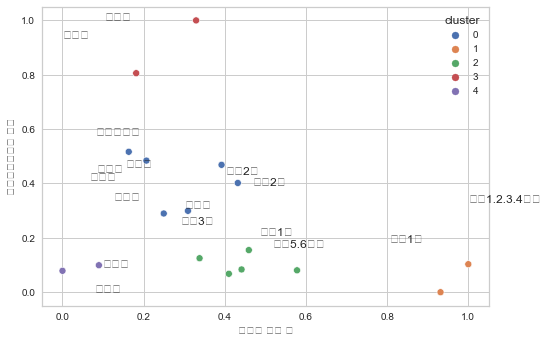

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

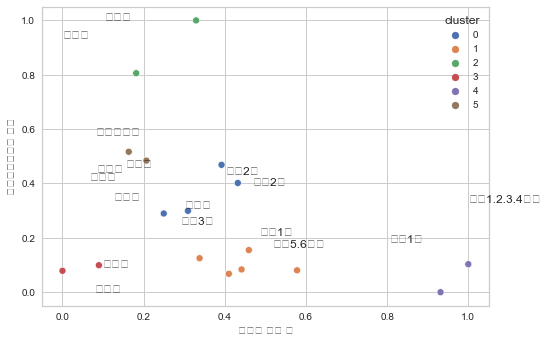

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 

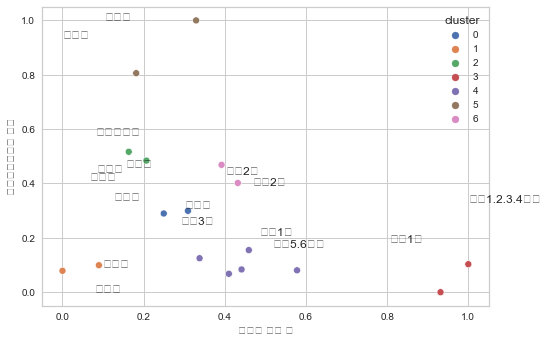

In [340]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(종로_df)
  종로_df['cluster'] = model.fit_predict(종로_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 종로_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 종로_df['생활보호대상자 비율']
  cluster_df['cluster'] = 종로_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('종로구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [341]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(종로_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
종로_df['cluster'] = model.fit_predict(종로_df)

In [342]:
종로_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
3    4
0    4
4    2
1    2
Name: cluster, dtype: int64

In [343]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.33368499, 0.66910073, 5.5       ],
       [0.18502229, 0.50045385, 2.        ],
       [0.44520654, 0.10242631, 4.        ],
       [0.1620951 , 0.19178696, 0.5       ],
       [0.96576523, 0.05153012, 3.        ]])

In [344]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 종로_df['인구 수']
cluster_df['생활보호대상자 비율'] = 종로_df['생활보호대상자 비율']
cluster_df['cluster'] = 종로_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,사직동,0.409926,0.067780,2
1,삼청동,0.000000,0.078787,3
2,부암동,0.441248,0.083738,2
3,평창동,0.931530,0.000000,4
4,무악동,0.337771,0.125039,2
5,교남동,0.459138,0.154979,2
6,가회동,0.089688,0.099301,3
7,종로1.2.3.4가동,0.329212,1.000000,0
8,종로5.6가동,0.163269,0.516658,1
9,이화동,0.309183,0.299437,3


In [345]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,사직동,0.409926,0.067780,2
1,삼청동,0.000000,0.078787,3
2,부암동,0.441248,0.083738,2
3,평창동,0.931530,0.000000,4
4,무악동,0.337771,0.125039,2
5,교남동,0.459138,0.154979,2
6,가회동,0.089688,0.099301,3
7,종로1.2.3.4가동,0.329212,1.000000,0
8,종로5.6가동,0.163269,0.516658,1
9,이화동,0.309183,0.299437,3


In [346]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/종로_cluster.csv')

#### 13-1. 군집화

In [347]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['종로1.2.3.4가동', '창신1동', '창신2동', '숭인2동']
cluster 1 :  ['종로5.6가동', '숭인1동']
cluster 2 :  ['사직동', '부암동', '무악동', '교남동', '청운효자동']
cluster 3 :  ['삼청동', '가회동', '이화동', '창신3동']
cluster 4 :  ['평창동', '혜화동']


#### 13-2. 클러스터별 인구수, 체육시설 수

In [348]:
# 클러스터별로 인구 수 합치기

종로_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/종로구_인구수, 수급인구비율.csv', index_col=0)
종로_peo_df = 종로_peo_df[['동', '인구 수']]
종로_peo_df = 종로_peo_df.rename(columns={'동':'dong'})
종로_peo_df


df_all = pd.merge(cluster_df, 종로_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,사직동,0.409926,0.067780,2,9806.0
1,삼청동,0.000000,0.078787,3,2909.0
2,부암동,0.441248,0.083738,2,10333.0
3,평창동,0.931530,0.000000,4,18582.0
4,무악동,0.337771,0.125039,2,8592.0
5,교남동,0.459138,0.154979,2,10634.0
6,가회동,0.089688,0.099301,3,4418.0
7,종로1.2.3.4가동,0.329212,1.000000,0,8448.0
8,종로5.6가동,0.163269,0.516658,1,5656.0
9,이화동,0.309183,0.299437,3,8111.0


In [349]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  34093.0
cluster 1 :  12044.0
cluster 2 :  51998.0
cluster 3 :  22545.0
cluster 4 :  38316.0


In [350]:
# a+b+c+d+e = 3

def prop(a, b, c, d, e):
  
  p1 = a*10000/34093.0
  p2 = b*10000/12044.0
  p3 = c*10000/51998.0
  p4 = d*10000/22545.0
  p5 = e*10000/38316.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2 + (p1-p5)**2 + (p2-p5)**2 + (p3-p5)**2 + (p4-p5)**2)


In [351]:
lst = []

for i, j, k, l, m in product(range(4), range(4), range(4), range(4), range(4)):
  if (i+j+k+l+m==3):
    lst.append([prop(i,j,k,l,m), (i,j,k,l,m)])

In [352]:
lst.sort()
lst

[[0.3982290453371411, (1, 0, 1, 0, 1)],
 [0.6634521605145915, (0, 0, 2, 0, 1)],
 [0.7048557160155888, (0, 0, 1, 1, 1)],
 [0.7102611926158344, (1, 0, 2, 0, 0)],
 [0.7354205472127543, (1, 0, 1, 1, 0)],
 [0.7587324751663164, (1, 0, 0, 1, 1)],
 [1.0370052229620257, (0, 0, 1, 0, 2)],
 [1.0375228453035326, (0, 0, 2, 1, 0)],
 [1.1277611650260808, (1, 0, 0, 0, 2)],
 [1.2988467585002121, (2, 0, 1, 0, 0)],
 [1.3314633650347905, (0, 0, 3, 0, 0)],
 [1.3427936684630244, (2, 0, 0, 0, 1)],
 [1.4137528536952784, (0, 0, 0, 1, 2)],
 [1.6431059874253098, (2, 0, 0, 1, 0)],
 [2.3005460326966194, (1, 1, 0, 0, 1)],
 [2.32478925559982, (0, 1, 1, 0, 1)],
 [2.3303497485031155, (1, 1, 1, 0, 0)],
 [2.404788077854596, (1, 1, 0, 1, 0)],
 [2.415471785855378, (0, 1, 0, 1, 1)],
 [2.452122552377092, (0, 0, 0, 0, 3)],
 [2.465910483671125, (0, 1, 1, 1, 0)],
 [2.7105720286478223, (0, 1, 2, 0, 0)],
 [2.9546189812959267, (0, 0, 1, 2, 0)],
 [2.957295927240238, (0, 0, 0, 2, 1)],
 [2.9716165575333258, (1, 0, 0, 2, 0)],
 [2.980

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '종로1.2.3.4가동', '창신1동', '창신2동', '숭인2동' (1개)
- cluster 1 :  '종로5.6가동', '숭인1동' (0개)
- cluster 2 :  '사직동', '부암동', '무악동', '교남동', '청운효자동' (1개)
- cluster 3 :  '삼청동', '가회동', '이화동', '창신3동' (0개)
- cluster 4 :  '평창동', '혜화동' (1개)

#### **2020년 기준 종로구 공공체육시설 설치 개수**
- cluster 0 :  종로1.2.3.4가동(2개) + 창신1동(1개) + 창신2동(0개) + 숭인2동(0개) = 3개
- cluster 1 :  종로5.6가동(2개) + 숭인1동(0개) = 2개
- cluster 2 :  사직동(1개) + 부암동(0개) + 무악동(0개) + 교남동(0개) + 청운효자동(2개) = 3개
- cluster 3 :  삼청동(0개) + 가회동(0개) + 이화동(0개) + 창신3동(0개) = 0개
- cluster 4 :  평창동(1개) + 혜화동(1개) = 2개 

#### 13-3. 입지선정

In [353]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.10951432757778422, 7],
 [0.041844404213374584, 10],
 [0.04357471108447483, 11],
 [0.08107605846778468, 14]]

In [354]:
lst.sort()
lst

[[0.041844404213374584, 10],
 [0.04357471108447483, 11],
 [0.08107605846778468, 14],
 [0.10951432757778422, 7]]

In [355]:
cluster_df.loc[[10]]

,dong,population,ratio,cluster
10,창신1동,0.181575,0.805874,0


In [356]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.002445069631190395, 0],
 [0.00036491280082552363, 2],
 [0.012053687162886559, 4],
 [0.002955920414554612, 5],
 [0.018097317410494508, 15]]

In [357]:
lst.sort()
lst

[[0.00036491280082552363, 2],
 [0.002445069631190395, 0],
 [0.002955920414554612, 5],
 [0.012053687162886559, 4],
 [0.018097317410494508, 15]]

In [358]:
cluster_df.loc[[2]]

,dong,population,ratio,cluster
2,부암동,0.441248,0.083738,2


In [359]:
# cluster4

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 4:
    lst.append([(cluster_df['population'][i]-centers[4][0])**2 + (cluster_df['ratio'][i]-centers[4][1])**2, i])
  
lst

[[0.003827372639879194, 3], [0.0038273726398791895, 16]]

In [360]:
lst.sort()
lst

[[0.0038273726398791895, 16], [0.003827372639879194, 3]]

In [361]:
cluster_df.loc[[16]]

,dong,population,ratio,cluster
16,혜화동,1.0,0.10306,4


### 14. 은평구

In [362]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

은평_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/은평구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =은평_df['동']
은평_df = 은평_df.iloc[:,2:]
은평_df = 은평_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
은평_df

,인구 수,생활보호대상자 비율
0,0.577351,0.322738
1,0.625332,0.345199
2,0.380060,0.927228
3,0.263881,1.000000
4,0.390908,0.490290
5,0.472608,0.385243
6,0.354820,0.564025
7,0.434954,0.198100
8,0.359103,0.234493
9,0.310774,0.879632


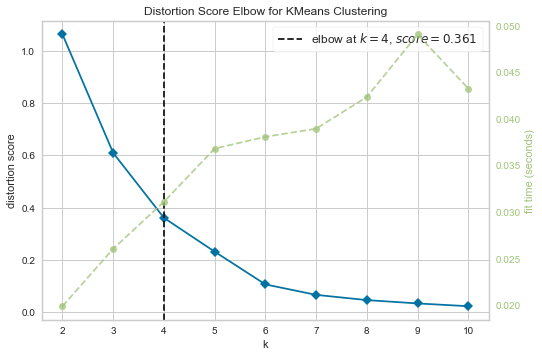

In [363]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(은평_df)
Elbow_M.show()

plt.show()

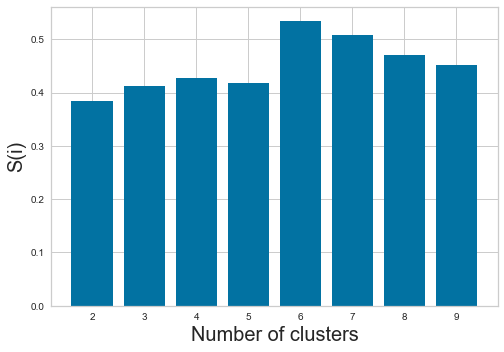

In [364]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(은평_df)
    silhouette_scores.append(silhouette_score(은평_df, m1.fit_predict(은평_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [365]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  6


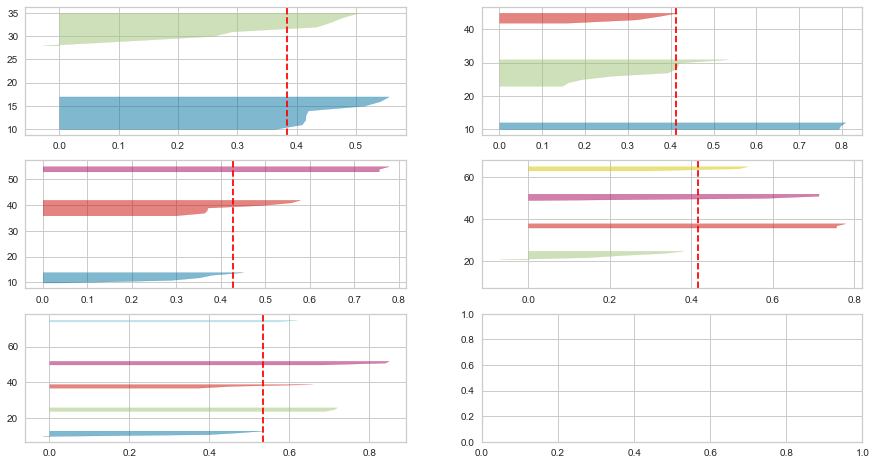

In [366]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(은평_df)

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 510

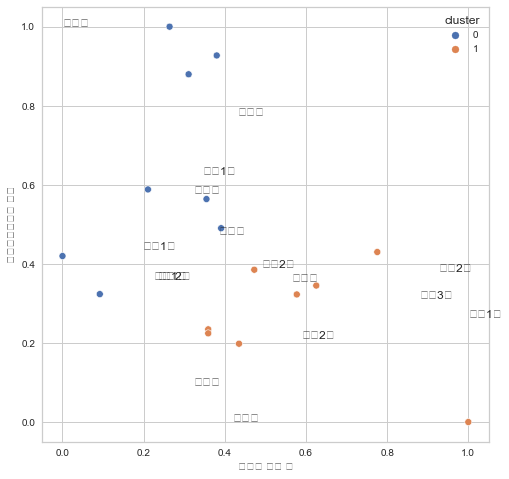

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 510

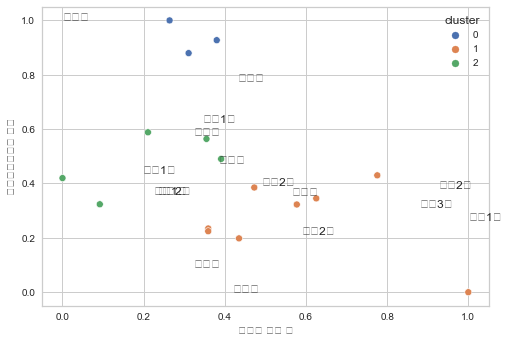

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 510

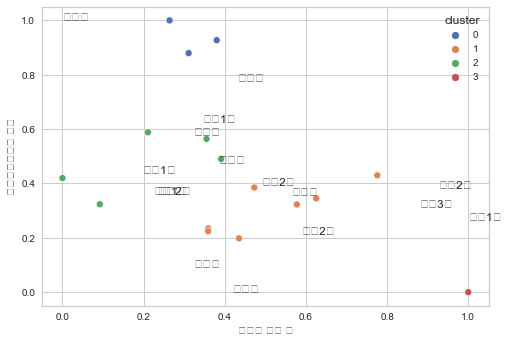

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 510

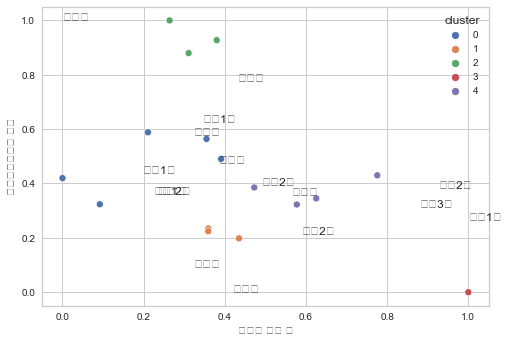

C:\Users\Koo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Koo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 510

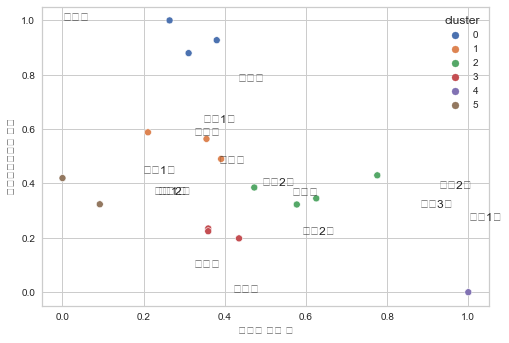

In [367]:
plt.figure(figsize = (8, 8))

for i in range(2,7):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(은평_df)
  은평_df['cluster'] = model.fit_predict(은평_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 은평_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 은평_df['생활보호대상자 비율']
  cluster_df['cluster'] = 은평_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('은평구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [368]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(은평_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
은평_df['cluster'] = model.fit_predict(은평_df)

In [369]:
은평_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    6
3    4
1    4
2    2
Name: cluster, dtype: int64

In [370]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.3185066 , 0.74158579, 0.5       ],
       [0.53828971, 0.16423774, 3.25      ],
       [0.04596939, 0.37173493, 5.        ],
       [0.61274947, 0.37080663, 2.        ]])

In [371]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 은평_df['인구 수']
cluster_df['생활보호대상자 비율'] = 은평_df['생활보호대상자 비율']
cluster_df['cluster'] = 은평_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,녹번동,0.577351,0.322738,3
1,불광1동,0.625332,0.345199,3
2,불광2동,0.380060,0.927228,0
3,갈현1동,0.263881,1.000000,0
4,갈현2동,0.390908,0.490290,0
5,구산동,0.472608,0.385243,3
6,대조동,0.354820,0.564025,0
7,응암1동,0.434954,0.198100,1
8,응암2동,0.359103,0.234493,1
9,응암3동,0.310774,0.879632,0


In [372]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,녹번동,0.577351,0.322738,3
1,불광1동,0.625332,0.345199,3
2,불광2동,0.380060,0.927228,0
3,갈현1동,0.263881,1.000000,0
4,갈현2동,0.390908,0.490290,0
5,구산동,0.472608,0.385243,3
6,대조동,0.354820,0.564025,0
7,응암1동,0.434954,0.198100,1
8,응암2동,0.359103,0.234493,1
9,응암3동,0.310774,0.879632,0


In [373]:
cluster_df.to_csv('./14개 자치구 (동,클러스터)/은평_cluster.csv')

#### 14-1. 군집화

In [374]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['불광2동', '갈현1동', '갈현2동', '대조동', '응암3동', '신사2동']
cluster 1 :  ['응암1동', '응암2동', '신사1동', '진관동']
cluster 2 :  ['증산동', '수색동']
cluster 3 :  ['녹번동', '불광1동', '구산동', '역촌동']


#### 14-2. 클러스터별 인구수, 체육시설 수

In [375]:
# 클러스터별로 인구 수 합치기

은평_peo_df = pd.read_csv('./14개 자치구 동별 정규화한 인구수, 생활보호대상자 비율 데이터/은평구_인구수, 수급인구비율.csv', index_col=0)
은평_peo_df = 은평_peo_df[['동', '인구 수']]
은평_peo_df = 은평_peo_df.rename(columns={'동':'dong'})
은평_peo_df


df_all = pd.merge(cluster_df, 은평_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,녹번동,0.577351,0.322738,3,37815.0
1,불광1동,0.625332,0.345199,3,40022.0
2,불광2동,0.380060,0.927228,0,28740.0
3,갈현1동,0.263881,1.000000,0,23396.0
4,갈현2동,0.390908,0.490290,0,29239.0
5,구산동,0.472608,0.385243,3,32997.0
6,대조동,0.354820,0.564025,0,27579.0
7,응암1동,0.434954,0.198100,1,31265.0
8,응암2동,0.359103,0.234493,1,27776.0
9,응암3동,0.310774,0.879632,0,25553.0


In [376]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  155452.0
cluster 1 :  144073.0
cluster 2 :  26745.0
cluster 3 :  157773.0


In [377]:
# a+b+c+d=11

def prop(a, b, c, d):
  
  p1 = a*10000/155452.0
  p2 = b*10000/144073.0
  p3 = c*10000/26745.0
  p4 = d*10000/157773.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [378]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [379]:
lst.sort()
lst

[[0.08061806401496299, (3, 3, 1, 4)],
 [0.0820542891949459, (4, 3, 1, 3)],
 [0.09059191529939055, (3, 4, 1, 3)],
 [0.1105603548997601, (4, 2, 1, 4)],
 [0.12227059341498903, (2, 4, 1, 4)],
 [0.12415516045650205, (4, 4, 1, 2)],
 [0.14125114969690575, (3, 2, 1, 5)],
 [0.14442376210769003, (2, 3, 1, 5)],
 [0.14511148337532437, (5, 2, 1, 3)],
 [0.14873243764763877, (5, 3, 1, 2)],
 [0.1707243616886583, (2, 5, 1, 3)],
 [0.17117270355018843, (3, 5, 1, 2)],
 [0.178322219487315, (4, 3, 0, 4)],
 [0.1900151699196349, (3, 4, 0, 4)],
 [0.1920277003876308, (4, 4, 0, 3)],
 [0.20843670899644767, (3, 3, 0, 5)],
 [0.20967335757094455, (4, 1, 1, 5)],
 [0.2120974660693803, (5, 1, 1, 4)],
 [0.2134496532508923, (5, 3, 0, 3)],
 [0.21919119480329743, (1, 4, 1, 5)],
 [0.22296032888632344, (5, 4, 1, 1)],
 [0.23522367555336954, (4, 2, 0, 5)],
 [0.23551794309983815, (1, 5, 1, 4)],
 [0.23686296868442847, (4, 5, 1, 1)],
 [0.2371838677667613, (2, 2, 1, 6)],
 [0.23822408933981826, (5, 2, 0, 4)],
 [0.24220056780919239,

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 : '불광2동', '갈현1동', '갈현2동', '대조동', '응암3동', '신사2동' (3개)
- cluster 1 : '응암1동', '응암2동', '신사1동', '진관동' (3개)
- cluster 2 : '증산동', '수색동' (1개)
- cluster 3 : '녹번동', '불광1동', '구산동', '역촌동' (4개)

####**2020년 기준 은평구 공공체육시설 설치 개수**
- cluster 0 : 대조동(1개) = 1개
- cluster 1 : 응암1동(1개) + 응암2동(1개) + 진관동(3개) = 5개
- cluster 2 : 증산동(1개) = 1개
- cluster 3 : 불광1동(1개) + 구산동(3개) = 4개

#### 14-3. 입지선정

In [380]:
# cluster0

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 0:
    lst.append([(cluster_df['population'][i]-centers[0][0])**2 + (cluster_df['ratio'][i]-centers[0][1])**2, i])
  
lst

[[0.03825175481149938, 2],
 [0.06976185869352845, 3],
 [0.06839137973886016, 4],
 [0.03284659113864718, 6],
 [0.019116486692898286, 9],
 [0.03512891128105637, 11]]

In [381]:
lst.sort()
lst

[[0.019116486692898286, 9],
 [0.03284659113864718, 6],
 [0.03512891128105637, 11],
 [0.03825175481149938, 2],
 [0.06839137973886016, 4],
 [0.06976185869352845, 3]]

In [382]:
cluster_df.loc[[9, 6, 11]]

,dong,population,ratio,cluster
9,응암3동,0.310774,0.879632,0
6,대조동,0.354820,0.564025,0
11,신사2동,0.210596,0.588340,0


In [383]:
# cluster1

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 1:
    lst.append([(cluster_df['population'][i]-centers[1][0])**2 + (cluster_df['ratio'][i]-centers[1][1])**2, i])
  
lst

[[0.011825013822127625, 7],
 [0.037043869396713926, 8],
 [0.03572238734825789, 10],
 [0.24015042778389775, 14]]

In [384]:
lst.sort()
lst

[[0.011825013822127625, 7],
 [0.03572238734825789, 10],
 [0.037043869396713926, 8],
 [0.24015042778389775, 14]]

In [385]:
cluster_df.loc[[7, 10, 8]]

,dong,population,ratio,cluster
7,응암1동,0.434954,0.198100,1
10,신사1동,0.359103,0.224357,1
8,응암2동,0.359103,0.234493,1


In [386]:
# cluster2

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 2:
    lst.append([(cluster_df['population'][i]-centers[2][0])**2 + (cluster_df['ratio'][i]-centers[2][1])**2, i])
  
lst

[[0.00443171494711358, 12], [0.004431714947113575, 13]]

In [387]:
lst.sort()
lst

[[0.004431714947113575, 13], [0.00443171494711358, 12]]

In [388]:
cluster_df.loc[[13]]

,dong,population,ratio,cluster
13,수색동,0.0,0.419886,2


In [389]:
# cluster3

lst = []

for i in range(len(cluster_df)):
  if cluster_df['cluster'][i] == 3:
    lst.append([(cluster_df['population'][i]-centers[3][0])**2 + (cluster_df['ratio'][i]-centers[3][1])**2, i])
  
lst

[[0.003563636236264621, 0],
 [0.0008140363793945331, 1],
 [0.0198481806909619, 5],
 [0.03006467474976808, 15]]

In [390]:
lst.sort()
lst

[[0.0008140363793945331, 1],
 [0.003563636236264621, 0],
 [0.0198481806909619, 5],
 [0.03006467474976808, 15]]

In [391]:
cluster_df.loc[[1, 0, 5, 15]]

,dong,population,ratio,cluster
1,불광1동,0.625332,0.345199,3
0,녹번동,0.577351,0.322738,3
5,구산동,0.472608,0.385243,3
15,역촌동,0.775708,0.430046,3
